<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/HeartDisorderMajorVersion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CARDIOHEALTH INSIGHTS: UNVEILING HEART DISORDER PATTERNS, MEDICATION RECOMMENDATIONS, AND CLASSIFICATION**

Diseases Risk Prediction Dataset, obtained from kaggle.Its source is the Behavioral Risk Factor Surveillance System (BRFSS). BRFSS conducts health-related phone surveys in the United States, gathering information on residents' health behaviors, chronic conditions, and use of preventive services.The Dataset contains 3,08,854 instances under 19 variables. 12 are numerical and 7 are categorical variables.

# **IMPORTING NECESSARY LIBRARIES**

In [847]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **LOADING THE DATASET**

In [848]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [849]:
df= pd.read_csv('/content/drive/My Drive/Data/CVD_cleaned.csv')
df


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [850]:
# df = pd.read_csv("/content/CVD_cleaned.csv")
# df

# **UNDERSTANDING THE DATASET**

In [851]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [852]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [853]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [854]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [856]:
df.shape

(308854, 19)

# **DATA CLEANING**

(General_Health                  0
 Checkup                         0
 Exercise                        0
 Heart_Disease                   0
 Skin_Cancer                     0
 Other_Cancer                    0
 Depression                      0
 Diabetes                        0
 Arthritis                       0
 Sex                             0
 Age_Category                    0
 Height_(cm)                     0
 Weight_(kg)                     0
 BMI                             0
 Smoking_History                 0
 Alcohol_Consumption             0
 Fruit_Consumption               0
 Green_Vegetables_Consumption    0
 FriedPotato_Consumption         0
 dtype: int64,
 <Axes: >)

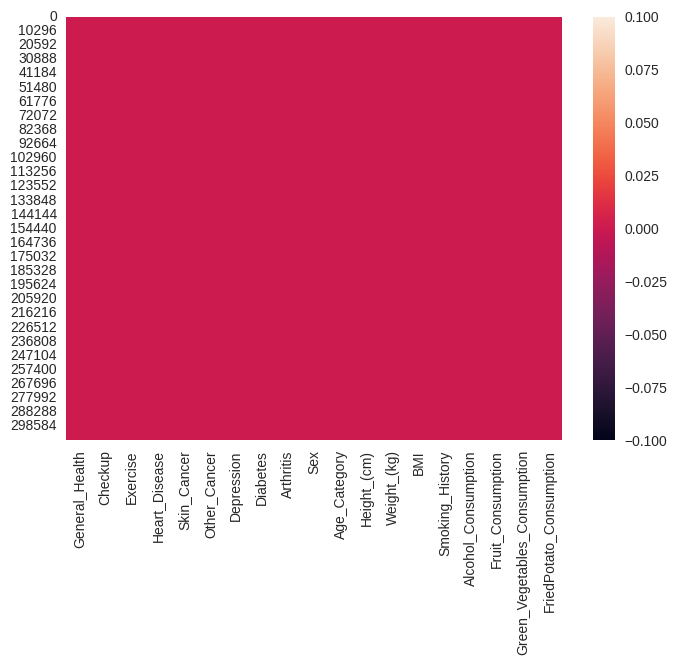

In [857]:
df.isna().sum(),sns.heatmap(df.isna())

In [858]:
df.duplicated().sum()

80

In [859]:
df.drop_duplicates(inplace=True)

In [860]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [861]:
df["Diabetes"].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [862]:
df["Diabetes"].replace(["No, pre-diabetes or borderline diabetes", "Yes, but female told only during pregnancy"], ["No", "Yes"],inplace=True)


# **DATA ANALYSIS**

Checking the distribution of Data

array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

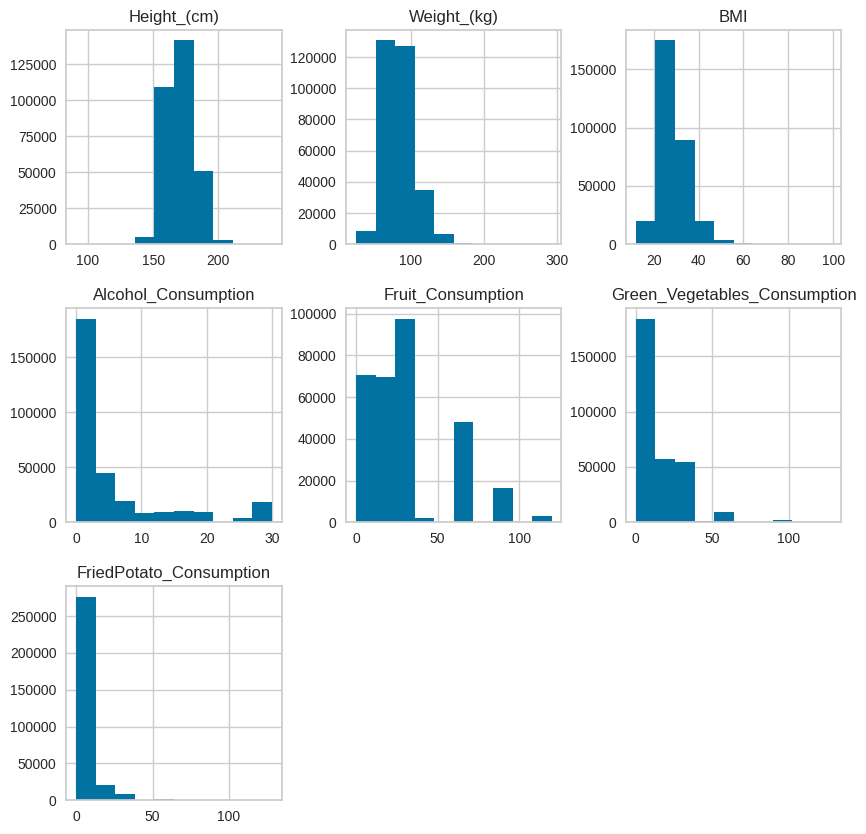

In [863]:
df.hist(figsize=(10,10))

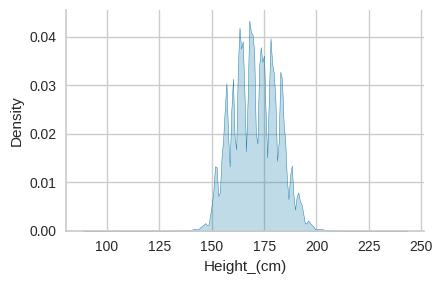

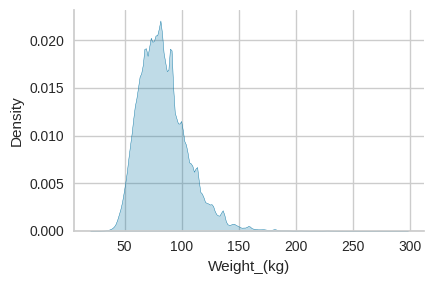

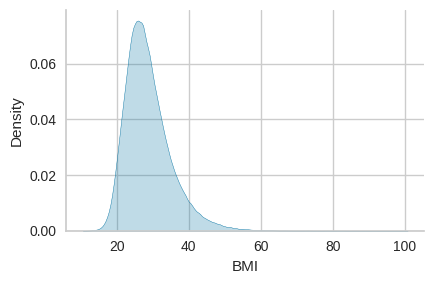

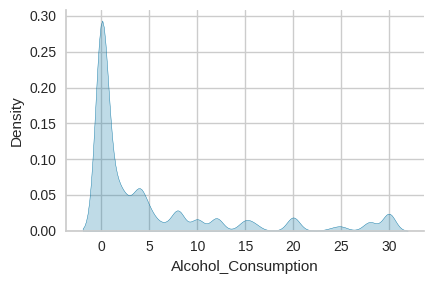

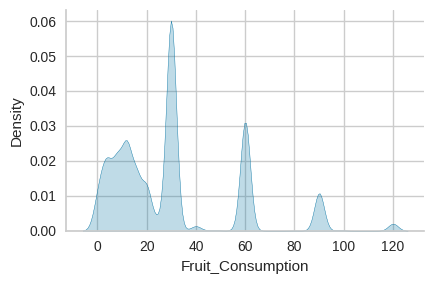

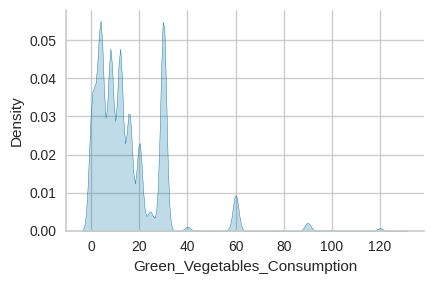

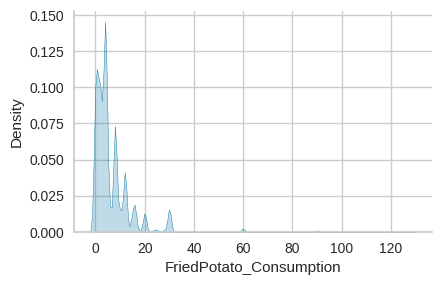

In [864]:
numerical_attributes = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for i in numerical_attributes:
    g = sns.FacetGrid(df,height=3,aspect=1.5)
    g = g.map(sns.kdeplot,i,shade=True)

**Observation**

* Distribution of Height is skewed
* Distribution of Weight shows little bit right skewness
* BMI is Uniformly distributed
* Others are skewed

<Axes: xlabel='General_Health', ylabel='count'>

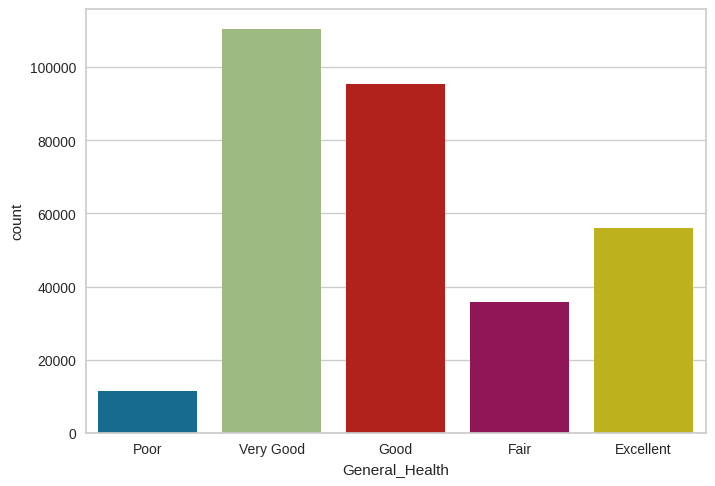

In [865]:
sns.countplot(data=df,x="General_Health")

In [866]:
General_Health_sub =["Poor","Very Good","Good","Fair","Excellent"]
for i in General_Health_sub:
  count = df.loc[df["General_Health"]==i] [["General_Health"]].count()
  average=(count*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  Poor General_Health    3
dtype: int64
Percentage of  Very Good General_Health    35
dtype: int64
Percentage of  Good General_Health    30
dtype: int64
Percentage of  Fair General_Health    11
dtype: int64
Percentage of  Excellent General_Health    18
dtype: int64


**Observations**

* **very good>good>excellent>fair>poor**
1. Percentage of "Poor General_Health": 3%
2. Percentage of "Very Good General_Health": 35%
3. Percentage of "Good General_Health": 30%
4. Percentage of "Fair General_Health": 11%
5. Percentage of "Excellent General_Health": 18%

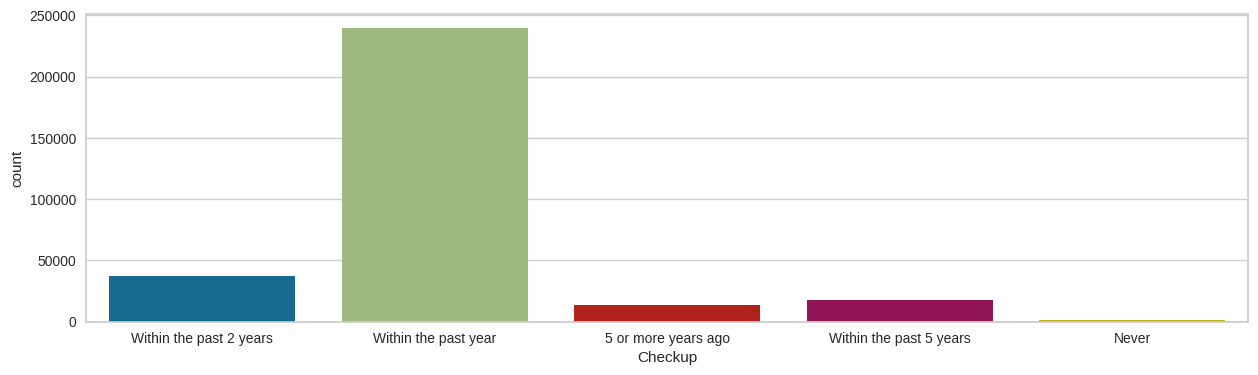

In [867]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Checkup")
plt.show()

In [868]:
Checkup_sub =["Within the past 2 years","Within the past year","5 or more years ago","Within the past 5 years","Never"]
for i in Checkup_sub:
  countc = df.loc[df["Checkup"]==i] [["Checkup"]].count()
  average=(countc*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  Within the past 2 years Checkup    12
dtype: int64
Percentage of  Within the past year Checkup    77
dtype: int64
Percentage of  5 or more years ago Checkup    4
dtype: int64
Percentage of  Within the past 5 years Checkup    5
dtype: int64
Percentage of  Never Checkup    0
dtype: int64


**Observations:**

* **Within the past year > Within the past 2 years > 5 or more years ago**
1. Percentage of "Within the past 2 years Checkup" is 12%.
2. Percentage of "Within the past year Checkup" is 77%.
3. Percentage of "5 or more years ago Checkup" is 4%.
4. Percentage of "Within the past 5 years Checkup" is 5%.
5. Percentage of "Never Checkup" is 0%.

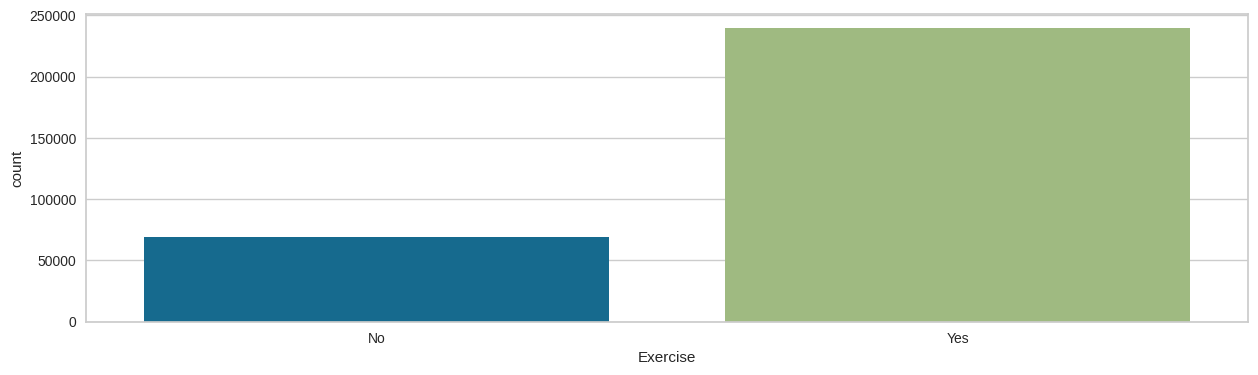

In [869]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Exercise")
plt.show()

In [870]:
Exercise_sub =["No","Yes"]
for i in Exercise_sub:
  countc = df.loc[df["Exercise"]==i] [["Exercise"]].count()
  average=(countc*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Exercise    22
dtype: int64
Percentage of  Yes Exercise    77
dtype: int64


**Observations:**

* Majority of people do exercises.
* Percentage of "No Exercise" is 22%
* Percentage ofpeople do Exercise is 77%

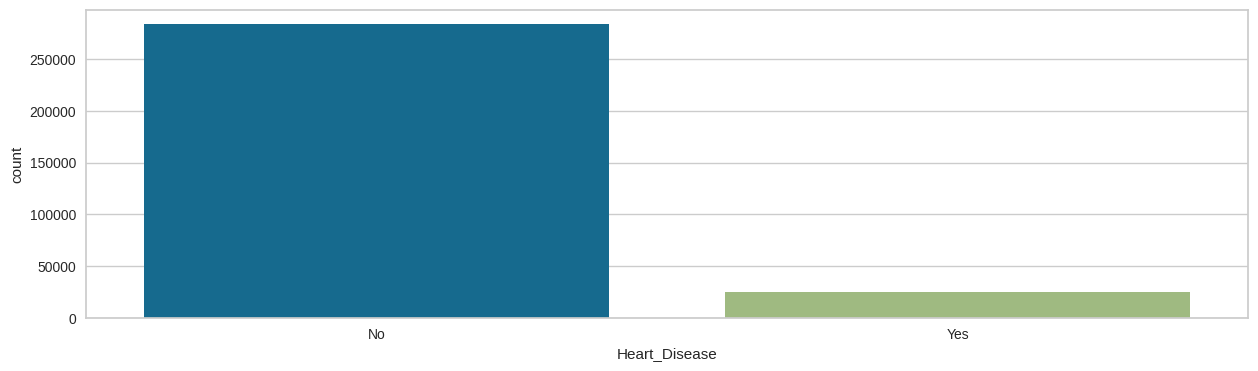

In [871]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Heart_Disease")
plt.show()

In [872]:
Heart_Disease_sub =["No","Yes"]
for i in Heart_Disease_sub:
  countc = df.loc[df["Heart_Disease"]==i] [["Heart_Disease"]].count()
  average=(countc*100)//len(df)
  print("Percentage of ",i,average)
  print(countc)

Percentage of  No Heart_Disease    91
dtype: int64
Heart_Disease    283803
dtype: int64
Percentage of  Yes Heart_Disease    8
dtype: int64
Heart_Disease    24971
dtype: int64


**Observations**

* Percentage of no heart disease 91%
* Percentage of people with heart disease 8%

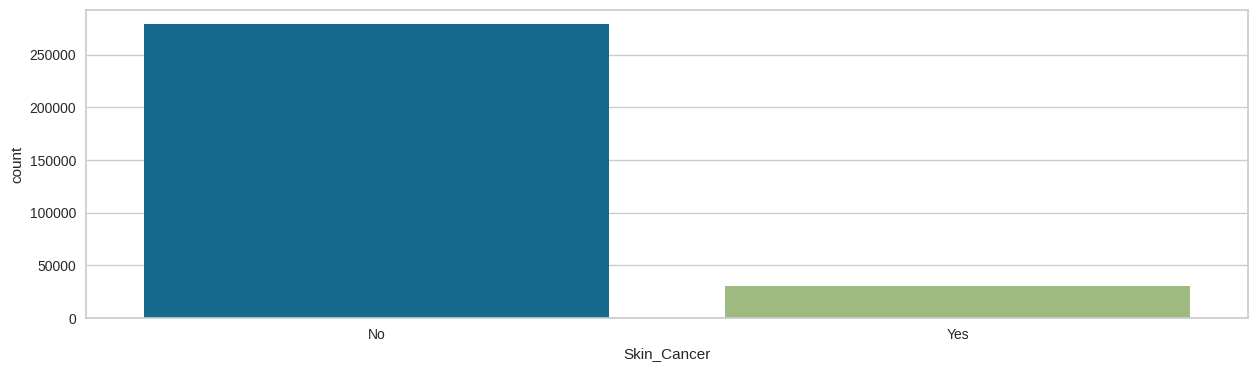

In [873]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Skin_Cancer")
plt.show()

In [874]:
Skin_Cancer_sub =["No","Yes"]
for i in Skin_Cancer_sub:
  countc = df.loc[df["Skin_Cancer"]==i] [["Skin_Cancer"]].count()
  average=(countc*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Skin_Cancer    90
dtype: int64
Percentage of  Yes Skin_Cancer    9
dtype: int64


**Observations:**

* Percentage of pearsons with No Skin_Cancer 90%
* Percentage of diseased 9%
*

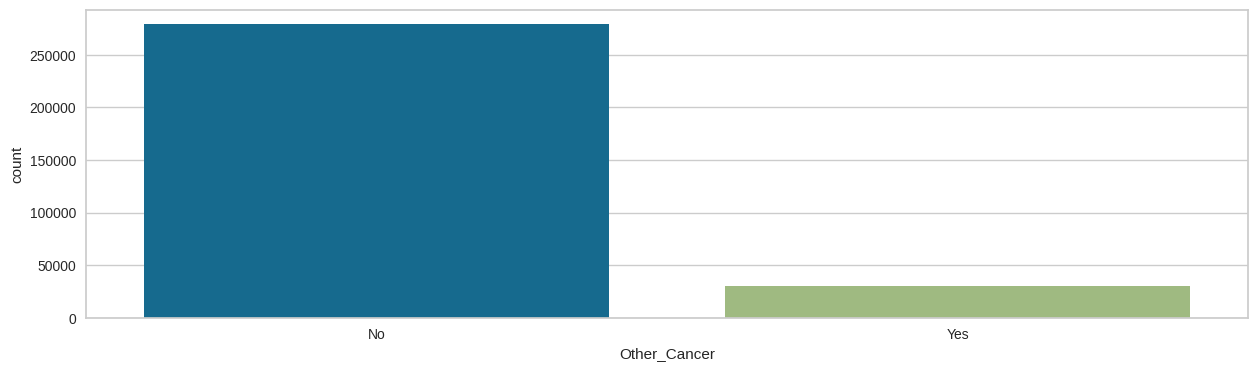

In [875]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Other_Cancer")
plt.show()

In [876]:
Other_Cancer_sub=["No","Yes"]
for i in Other_Cancer_sub:
  countO = df.loc[df["Other_Cancer"]==i] [["Other_Cancer"]].count()
  average=(countO*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Other_Cancer    90
dtype: int64
Percentage of  Yes Other_Cancer    9
dtype: int64


**Observations:**

* Percentage of patients with No other_Cancer 90%
* Percentage of diseased 9%
* data is imbalanced

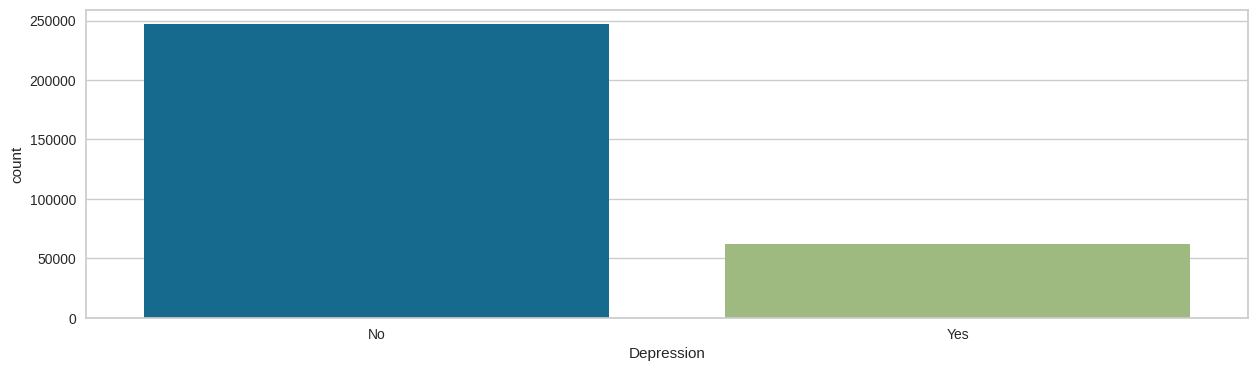

In [877]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Depression")
plt.show()

In [878]:
Depression_sub=["No","Yes"]
for i in Depression_sub:
  countd = df.loc[df["Depression"]==i] [["Depression"]].count()
  average=(countd*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Depression    79
dtype: int64
Percentage of  Yes Depression    20
dtype: int64


**Observations:**

* Percentage of pearsons with no depression 80%
* Percentage of patients with depression: 19%

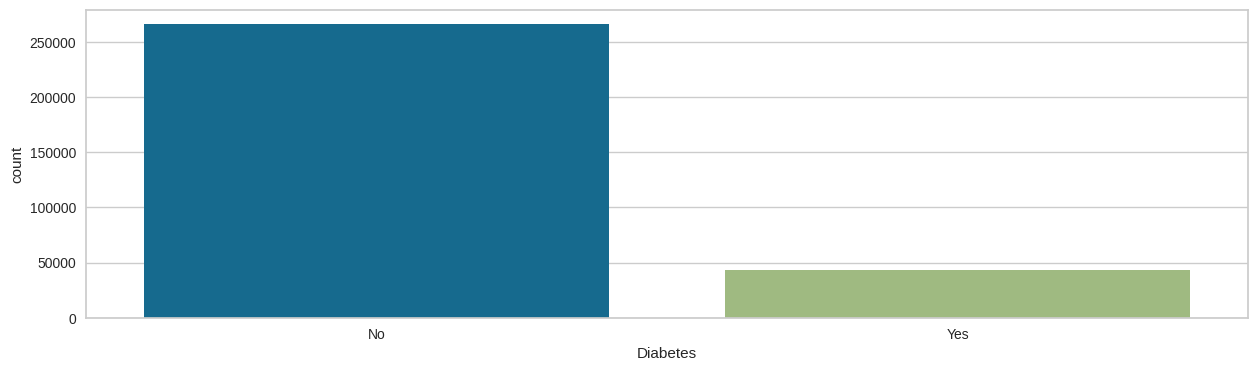

In [879]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Diabetes")
plt.show()

In [880]:
Diabetes_sub=["No","Yes"]
for i in Diabetes_sub:
  countd = df.loc[df["Diabetes"]==i] [["Diabetes"]].count()
  average=(countd*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Diabetes    86
dtype: int64
Percentage of  Yes Diabetes    13
dtype: int64


**Observations:**

* Most patients do not have Diabetes and the percentage is:86%
* Percentage of patients with diabetes is:13%

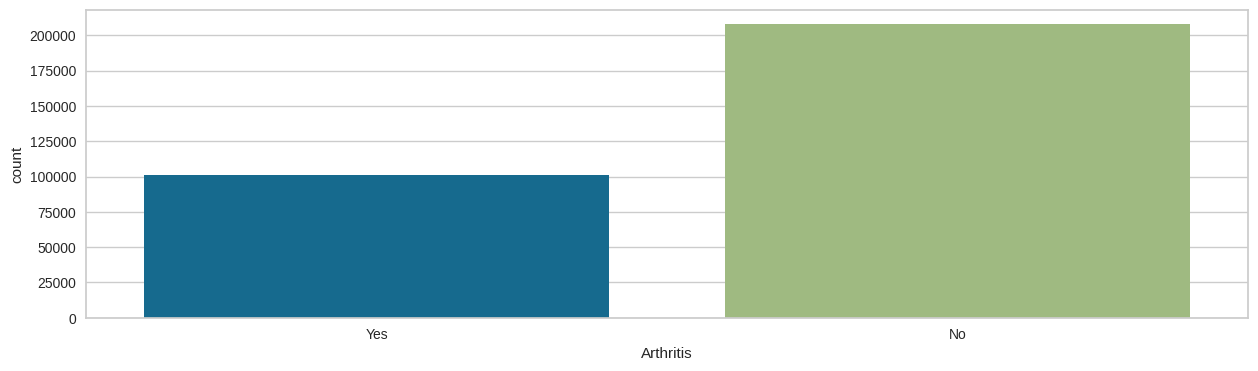

In [881]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Arthritis")
plt.show()

In [882]:
Arthritis_sub=["No","Yes"]
for i in Arthritis_sub:
  countd = df.loc[df["Arthritis"]==i] [["Arthritis"]].count()
  average=(countd*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Arthritis    67
dtype: int64
Percentage of  Yes Arthritis    32
dtype: int64


* Majority of patients do not have Arthritis,the percentage is 80%
* Only 19% of patients suffer from arthrities.

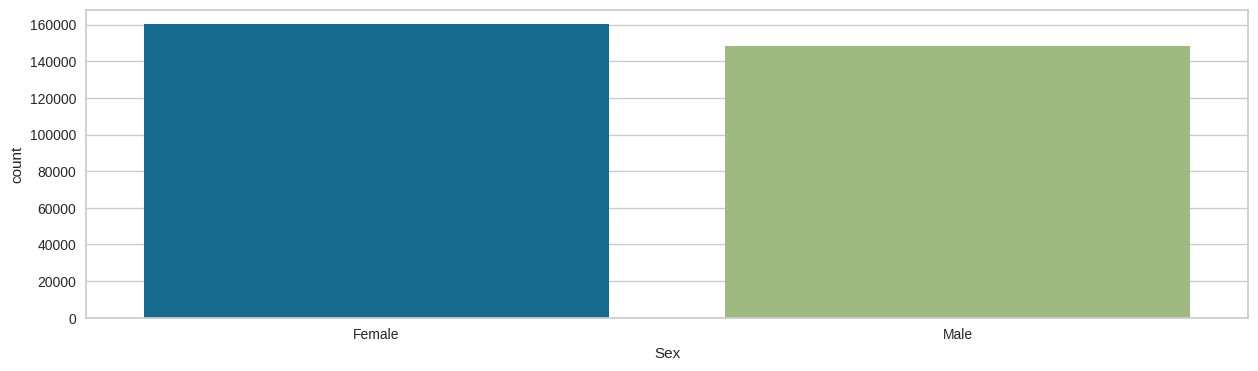

In [883]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Sex")
plt.show()

In [884]:
Sex_sub=["Female","Male"]
for i in Sex_sub:
  counts = df.loc[df["Sex"]==i] [["Sex"]].count()
  average=(counts*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  Female Sex    51
dtype: int64
Percentage of  Male Sex    48
dtype: int64


**Observations**

* Percentage of Females 51%
* Percentage of Males 48%
* Gender is balanced

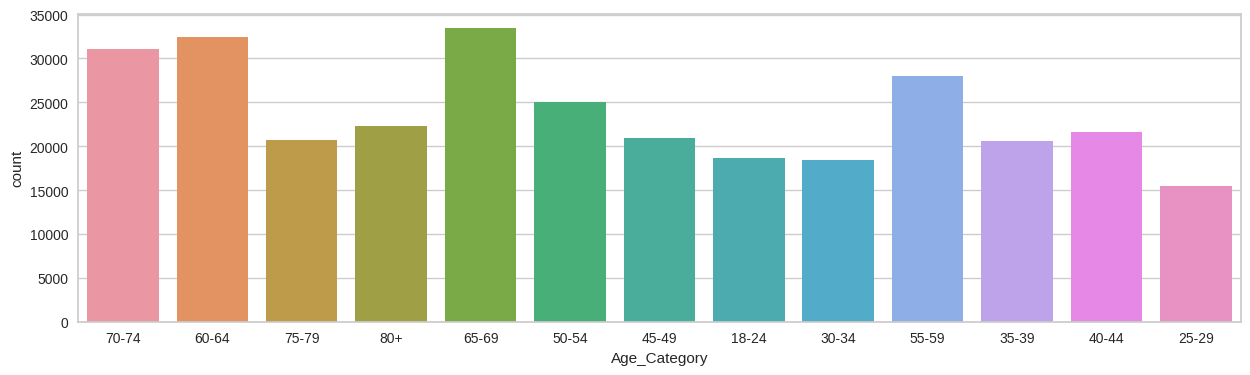

In [885]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Age_Category")
plt.show()

In [886]:
df["Age_Category"].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [887]:
Age_Category_sub=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in Age_Category_sub:
  countd = df.loc[df["Age_Category"]==i] [["Age_Category"]].count()
  average=(countd*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  70-74 Age_Category    10
dtype: int64
Percentage of  60-64 Age_Category    10
dtype: int64
Percentage of  75-79 Age_Category    6
dtype: int64
Percentage of  80+ Age_Category    7
dtype: int64
Percentage of  65-69 Age_Category    10
dtype: int64
Percentage of  50-54 Age_Category    8
dtype: int64
Percentage of  45-49 Age_Category    6
dtype: int64
Percentage of  18-24 Age_Category    6
dtype: int64
Percentage of  30-34 Age_Category    5
dtype: int64
Percentage of  55-59 Age_Category    9
dtype: int64
Percentage of  35-39 Age_Category    6
dtype: int64
Percentage of  40-44 Age_Category    6
dtype: int64
Percentage of  25-29 Age_Category    5
dtype: int64


**Observations:**

1. Percentage of the 70-74 Age_Category is 10%.

2. Percentage of the 60-64 Age_Category is 10%.

3. Percentage of the 75-79 Age_Category is 6%.

4. Percentage of the 80+ Age_Category is 7%.

5. Percentage of the 65-69 Age_Category is 10%.

6. Percentage of the 50-54 Age_Category is 8%.

7. Percentage of the 45-49 Age_Category is 6%.

8. Percentage of the 18-24 Age_Category is 6%.

9. Percentage of the 30-34 Age_Category is 5%.

10. Percentage of the 55-59 Age_Category is 9%.

11. Percentage of the 35-39 Age_Category is 6%.

12. Percentage of the 40-44 Age_Category is 6%.

13. Percentage of the 25-29 Age_Category is 5%.



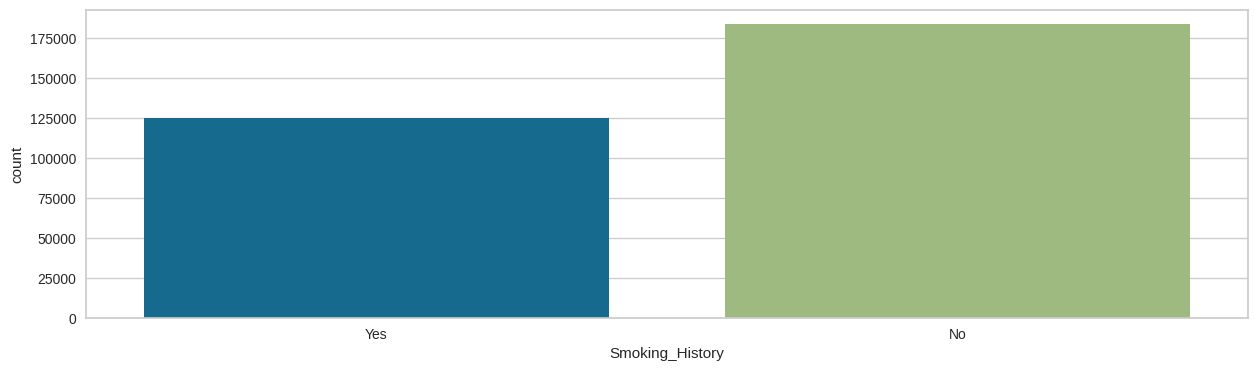

In [888]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Smoking_History")
plt.show()

In [889]:
Smoking_History_sub=["No","Yes"]
for i in Smoking_History_sub:
  countS = df.loc[df["Smoking_History"]==i] [["Smoking_History"]].count()
  average=(countS*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Smoking_History    59
dtype: int64
Percentage of  Yes Smoking_History    40
dtype: int64


**Observations:**

1. Percentage of patients with no smoking history is 58%.
2. Percentage of patients with smoking history is 41%.

**ANALYSIS BETWEEN DISEASE CONDITIONS AND CORRESPONDING FACTORS**

**Heart Disease Vs Factors**

1.Relationship between Heart_Disease General_Health

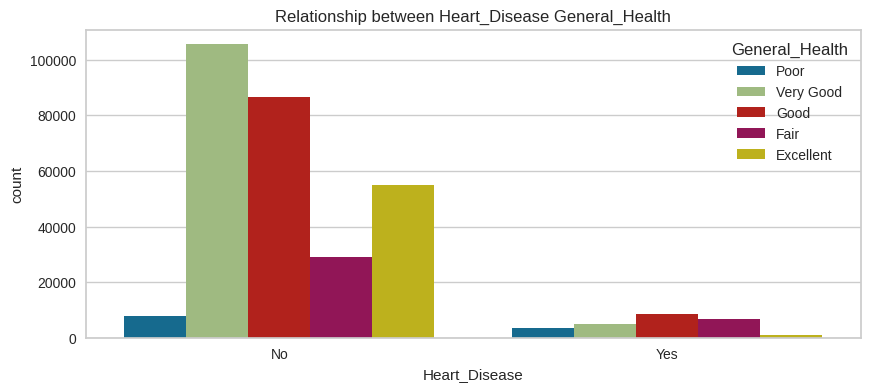

In [890]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="General_Health")
plt.title("Relationship between Heart_Disease General_Health")
plt.show()

In [891]:
print("Details about reviewers with Heart_Disease, based on General_Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    data = len(df.loc[(df["General_Health"]==i)])
    data1 = len(df.loc[(df["Heart_Disease"] == "Yes") & (df["General_Health"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "% of reviewers come under general health ",i," and with heart disorder ")

Details about reviewers with Heart_Disease, based on General_Health
---------------------------------------------------------------------------
31 % of reviewers come under general health  Poor  and with heart disorder 
4 % of reviewers come under general health  Very Good  and with heart disorder 
9 % of reviewers come under general health  Good  and with heart disorder 
18 % of reviewers come under general health  Fair  and with heart disorder 
1 % of reviewers come under general health  Excellent  and with heart disorder 


**Observation:**
*The largest percentage of reviewers comes under general health poor category




2.Relationship between Exercise and Heart_Disease

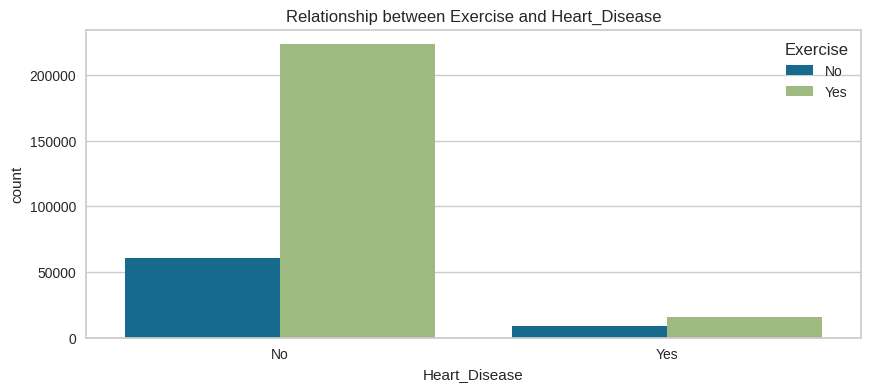

In [892]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="Exercise")
plt.title("Relationship between Exercise and Heart_Disease")
plt.show()

In [893]:
print("Details about reviewers with Heart_Disease, based on Exercise")
print("-"*75)
lst_E=["Yes","No"]
for i in lst_E:
    datae = len(df.loc[(df["Exercise"]==i)])
    data1e = len(df.loc[(df["Heart_Disease"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1e * 100) // datae
    print(percentage, "% of reviewers with exercise ",i," and having heart disorder ")

Details about reviewers with Heart_Disease, based on Exercise
---------------------------------------------------------------------------
6 % of reviewers with exercise  Yes  and having heart disorder 
12 % of reviewers with exercise  No  and having heart disorder 


**Observation:**
* Chances of heart failure is double for people who dont do any exercises or activities

3.Relationship between Sex and Heart_Disease

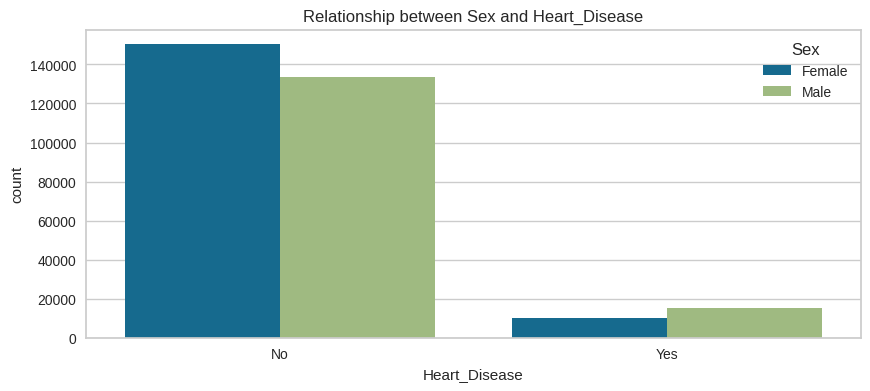

In [894]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="Sex")
plt.title("Relationship between Sex and Heart_Disease")
plt.show()

In [895]:
print("Details about reviewers with Heart_Disease, based on Sex")
print("-"*75)
lst_S=["Male","Female"]
for i in lst_S:
    datas = len(df.loc[(df["Sex"]==i)])
    data1s = len(df.loc[(df["Heart_Disease"] == "Yes") & (df["Sex"] == i)])
    percentages = (data1s * 100) // datas
    print(percentages, "% of reviewers with heart disorder come under Sex ",i)

Details about reviewers with Heart_Disease, based on Sex
---------------------------------------------------------------------------
10 % of reviewers with heart disorder come under Sex  Male
6 % of reviewers with heart disorder come under Sex  Female


Observation:
* 10 percentage of males have heart disorders
* 6 percentage of females have heart disorders
* Chances of heart failure for male is higher than females

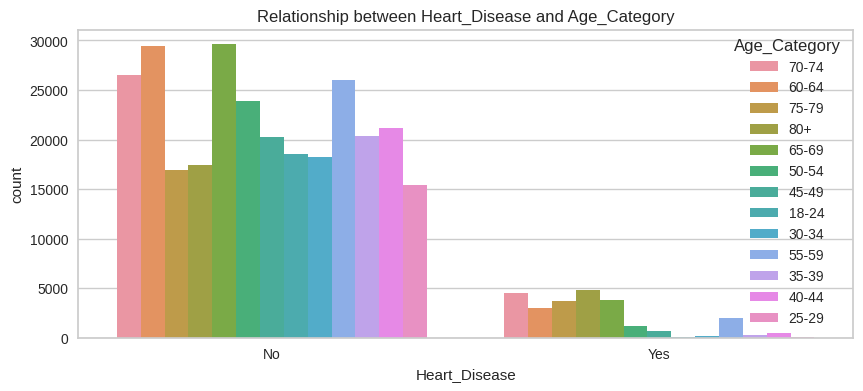

In [896]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="Age_Category")
plt.title("Relationship between Heart_Disease and Age_Category")
plt.show()

In [897]:
age_cat = df.loc[df["Heart_Disease"]=="Yes"].groupby("Age_Category") ["Heart_Disease"].count().sort_values(ascending=False)
age_cat

Age_Category
80+      4856
70-74    4561
65-69    3823
75-79    3752
60-64    3012
55-59    1991
50-54    1181
45-49     678
40-44     435
35-39     274
30-34     201
25-29     113
18-24      94
Name: Heart_Disease, dtype: int64

In [898]:
print("Details about reviewers with Heart_Disease based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    datasc= len(df.loc[(df["Age_Category"]==i)])
    data1sc = len(df[(df["Heart_Disease"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1sc * 100) // datasc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Heart_Disease based on Age_Category
---------------------------------------------------------------------------
14 %  Age_Category  70-74
9 %  Age_Category  60-64
18 %  Age_Category  75-79
21 %  Age_Category  80+
11 %  Age_Category  65-69
4 %  Age_Category  50-54
3 %  Age_Category  45-49
0 %  Age_Category  18-24
1 %  Age_Category  30-34
7 %  Age_Category  55-59
1 %  Age_Category  35-39
2 %  Age_Category  40-44
0 %  Age_Category  25-29


Observation:
* Chances of heart disorder is higher in higher age groups compared to lower age groups


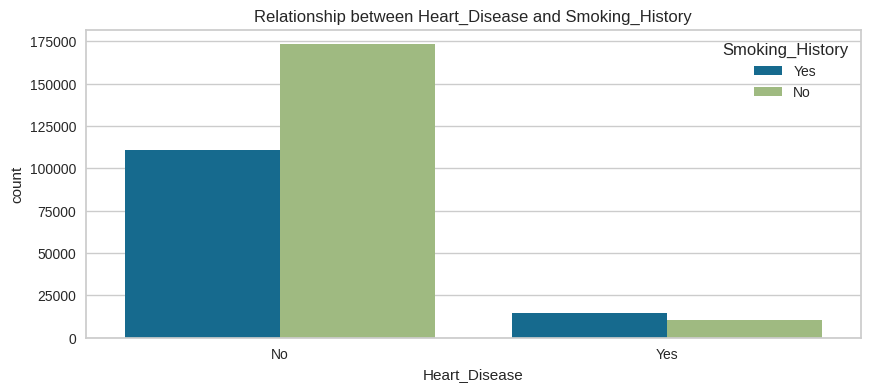

In [899]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="Smoking_History")
plt.title("Relationship between Heart_Disease and Smoking_History")
plt.show()

In [900]:
print("Details about reviewers with Heart_Disease based on Smoking_History")
print("-"*75)
lst_SH=["Yes","No"]
for i in lst_SH:
    datash = len(df.loc[(df["Smoking_History"]==i)])
    data1sh = len(df.loc[(df["Heart_Disease"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1sh * 100) // datash
    print(percentage, "% of reviewers with heart disease and Smoking_History ",i)

Details about reviewers with Heart_Disease based on Smoking_History
---------------------------------------------------------------------------
12 % of reviewers with heart disease and Smoking_History  Yes
4 % of reviewers with heart disease and Smoking_History  No


Observation:
* heart disorder rate is 3 times  more in people with smoking history

**Skin_cancer and variables**

1.Relationship between Skin_Cancer and General_Health

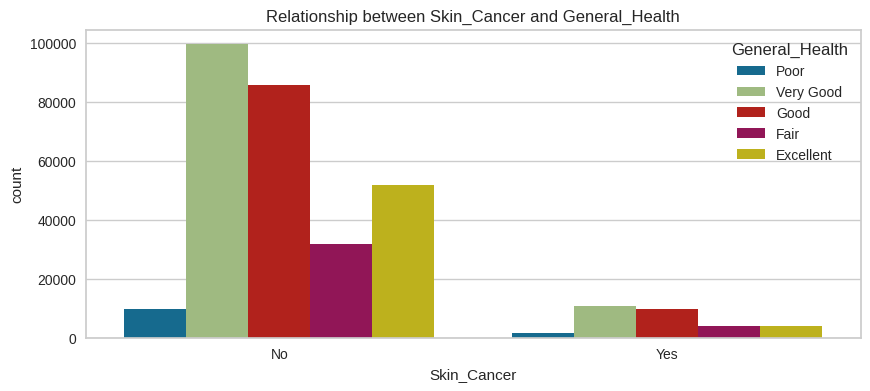

In [901]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="General_Health")
plt.title("Relationship between Skin_Cancer and General_Health")
plt.show()

In [902]:
# skin_c = df.loc[df["Skin_Cancer"]=="Yes"].groupby("General_Health") ["Skin_Cancer"].count().sort_values(ascending=False)
# skin_c

In [903]:
print("Percentage of reviewers with Skin_Cancer based on General Health")
print("-"*75)
print("Percentage of reviewers with Skin_Cancer based on General Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    data = len(df.loc[(df["General_Health"]==i)])
    data1sc = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["General_Health"] == i)])
    percentagesc = (data1sc * 100) // data
    print(percentagesc, "% come under General Health",i,"category")

Percentage of reviewers with Skin_Cancer based on General Health
---------------------------------------------------------------------------
Percentage of reviewers with Skin_Cancer based on General Health
---------------------------------------------------------------------------
14 % come under General Health Poor category
9 % come under General Health Very Good category
10 % come under General Health Good category
11 % come under General Health Fair category
7 % come under General Health Excellent category


Observation:
* Skin cancer is more common in patients who rate their general health as Good,fair or poor

2.Relationship between Skin_Cancer and Exercise

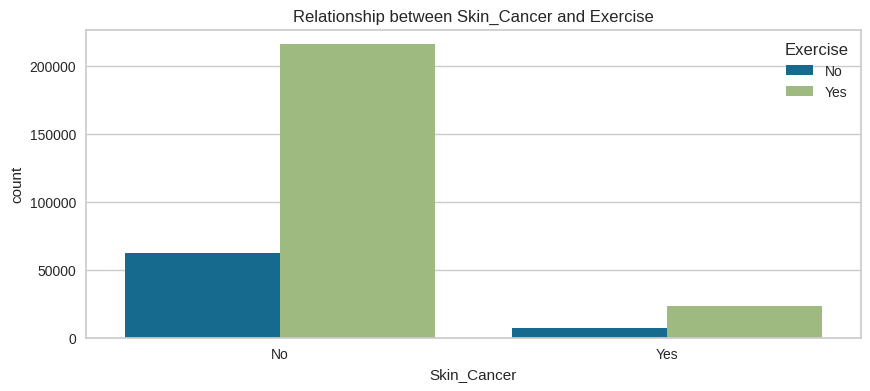

In [904]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="Exercise")
plt.title("Relationship between Skin_Cancer and Exercise")
plt.show()

In [905]:
print("Details about reviewers with Skin_Cancer based on Exercise")
print("-"*75)
lst_E=["Yes","No"]
for i in lst_E:
    datasce = len(df.loc[(df["Exercise"]==i)])
    data1sce = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1sce * 100) // datasce
    print(percentage, "%  exercise ",i,)

Details about reviewers with Skin_Cancer based on Exercise
---------------------------------------------------------------------------
9 %  exercise  Yes
9 %  exercise  No


Observation:
* Exercise have no relevance in skin cancer

3.Relationship between Skin_Cancer and Sex

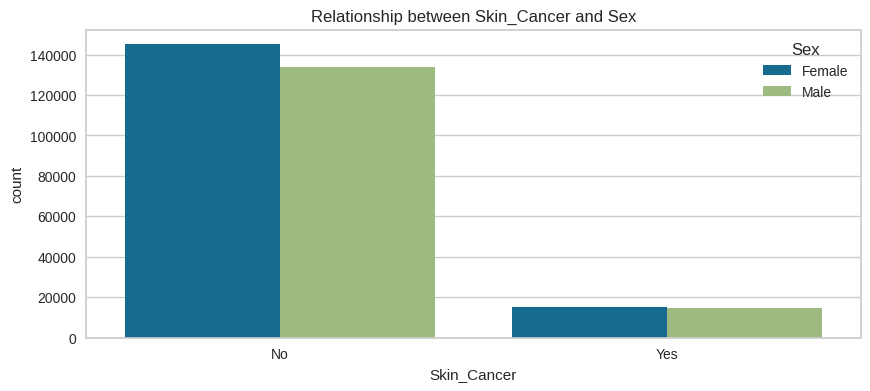

In [906]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="Sex")
plt.title("Relationship between Skin_Cancer and Sex")
plt.show()

In [907]:
print("Details about reviewers with Skin_Cancer based on Sex")
print("-"*75)
lst_S=["Male","Female"]
for i in lst_S:
    datasc = len(df.loc[(df["Sex"]==i)])
    data1sc = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["Sex"] == i)])
    percentages = (data1sc * 100) // datasc
    print(percentages, "% of are ",i)

Details about reviewers with Skin_Cancer based on Sex
---------------------------------------------------------------------------
10 % of are  Male
9 % of are  Female


4.Relationship between Skin_Cancer and Age_Category

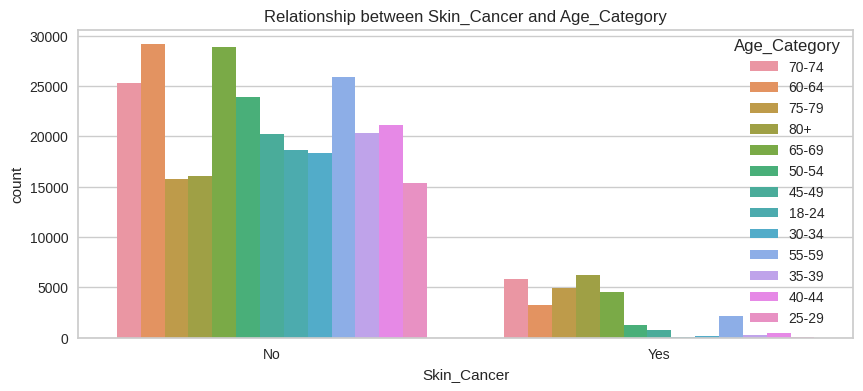

In [908]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="Age_Category")
plt.title("Relationship between Skin_Cancer and Age_Category")
plt.show()

In [909]:
age_cats = df.loc[df["Skin_Cancer"]=="Yes"].groupby("Age_Category") ["Skin_Cancer"].count().sort_values(ascending=False)
age_cats

Age_Category
80+      6210
70-74    5841
75-79    4904
65-69    4585
60-64    3289
55-59    2138
50-54    1241
45-49     720
40-44     500
35-39     292
30-34     134
25-29      83
18-24      55
Name: Skin_Cancer, dtype: int64

In [910]:
print("Details about reviewers with Skin_Cancer based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    datasc= len(df.loc[(df["Age_Category"]==i)])
    data1sc = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1sc * 100) // datasc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Skin_Cancer based on Age_Category
---------------------------------------------------------------------------
18 %  Age_Category  70-74
10 %  Age_Category  60-64
23 %  Age_Category  75-79
27 %  Age_Category  80+
13 %  Age_Category  65-69
4 %  Age_Category  50-54
3 %  Age_Category  45-49
0 %  Age_Category  18-24
0 %  Age_Category  30-34
7 %  Age_Category  55-59
1 %  Age_Category  35-39
2 %  Age_Category  40-44
0 %  Age_Category  25-29


Observation:
* Chances of skin cancer is higher in higher age groups compared to lower age groups



5.Relationship between Skin_Cancer and Smoking_History

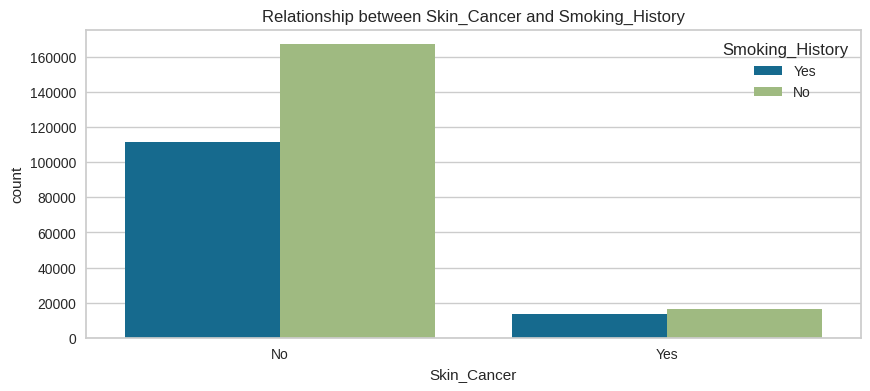

In [911]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="Smoking_History")
plt.title("Relationship between Skin_Cancer and Smoking_History")
plt.show()

In [912]:
print("Details about reviewers with Skin_Cancer based on Smoking_History")
print("-"*75)
lst_SH=["Yes","No"]
for i in lst_SH:
    datash = len(df.loc[(df["Smoking_History"]==i)])
    data1sh = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["Smoking_History"] == i)])
    percentage = (data1sh * 100) // datash
    print(percentage, "% of reviewers with heart disease and Smoking_History ",i)

Details about reviewers with Skin_Cancer based on Smoking_History
---------------------------------------------------------------------------
10 % of reviewers with heart disease and Smoking_History  Yes
8 % of reviewers with heart disease and Smoking_History  No


Observation:
* Smoking increases the chanceS for skin cancer

**Other_Cancer Vs variables**

1.Relationship between Other_Cancer and General_Health

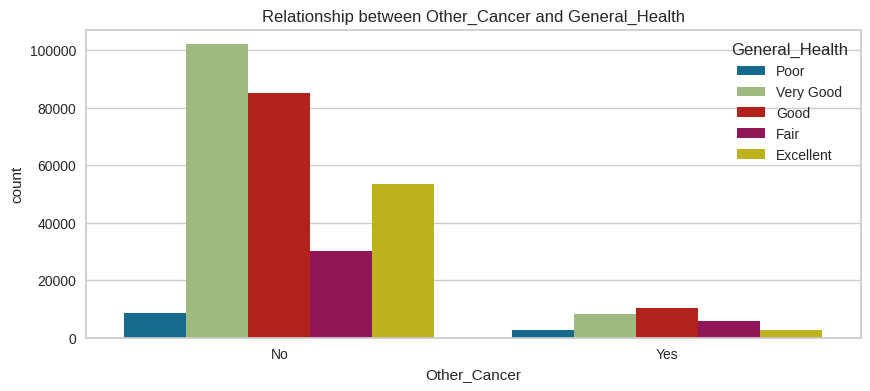

In [913]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="General_Health")
plt.title("Relationship between Other_Cancer and General_Health")
plt.show()

In [914]:
print("Percentage of reviewers with Skin_Cancer based on General Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    data = len(df.loc[(df["General_Health"]==i)])
    data1sc = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["General_Health"] == i)])
    percentagesc = (data1sc * 100) // data
    print(percentagesc, "% come under General Health",i,"category")

Percentage of reviewers with Skin_Cancer based on General Health
---------------------------------------------------------------------------
24 % come under General Health Poor category
7 % come under General Health Very Good category
10 % come under General Health Good category
15 % come under General Health Fair category
4 % come under General Health Excellent category


Observation:
* Other cancers are more  in patients who rate their general health as "Poor" or "Fair"

2.Relationship between Other_Cancer and Exercise

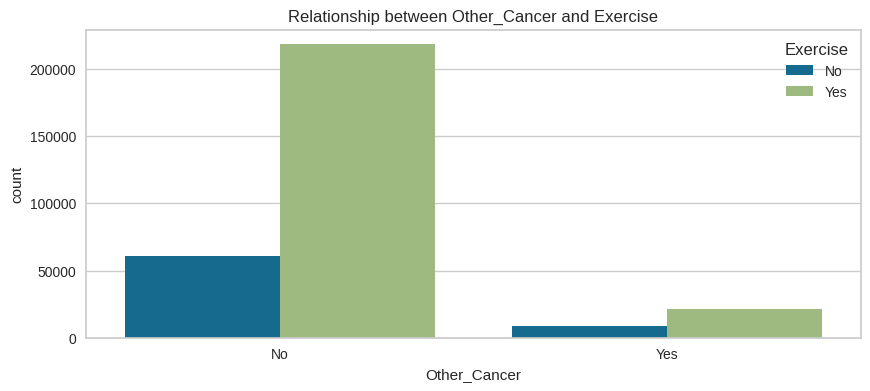

In [915]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="Exercise")
plt.title("Relationship between Other_Cancer and Exercise")
plt.show()

In [916]:
print("Details about reviewers with Other_Cancer based on Exercise")
print("-"*75)
lst_E=["Yes","No"]
for i in lst_E:
    datasce = len(df.loc[(df["Exercise"]==i)])
    data1sce = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1sce * 100) // datasce
    print(percentage, "%  exercise ",i,)

Details about reviewers with Other_Cancer based on Exercise
---------------------------------------------------------------------------
8 %  exercise  Yes
12 %  exercise  No


Observation:
* Other type of cancer is slightly more common in patients who do not exercise

3.Relationship between Other_Cancer and Sex

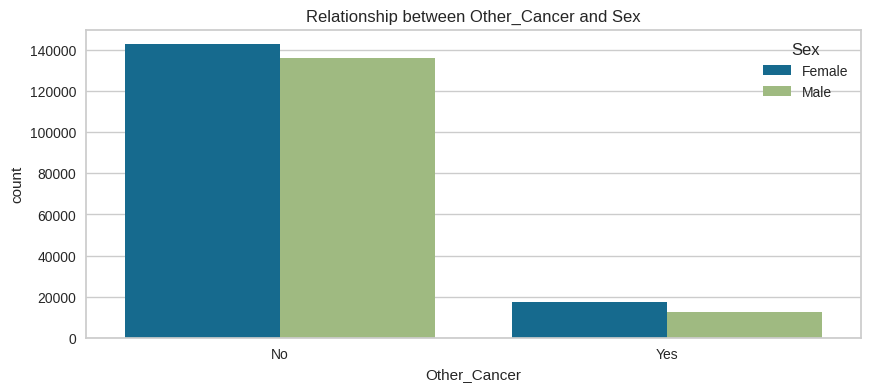

In [917]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="Sex")
plt.title("Relationship between Other_Cancer and Sex")
plt.show()

In [918]:
print("Details about reviewers with Other_Cancer based on Exercise")
print("-"*75)
lst_S=["Male","Female"]
for i in lst_S:
    dataoc= len(df.loc[(df["Sex"]==i)])
    data1oc = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["Sex"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  sex ",i,)

Details about reviewers with Other_Cancer based on Exercise
---------------------------------------------------------------------------
8 %  sex  Male
10 %  sex  Female


Observation:
* Other type of cancer is slightly more in females

4.Relationship between Other_Cancer and Age_Category

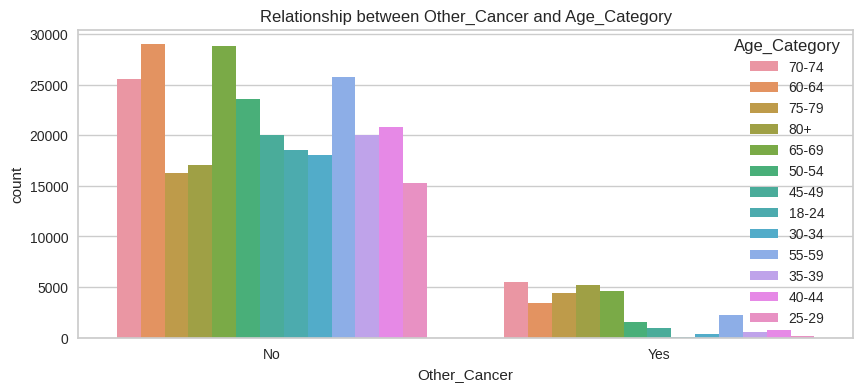

In [919]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="Age_Category")
plt.title("Relationship between Other_Cancer and Age_Category")
plt.show()

In [920]:
age_cato = df.loc[df["Other_Cancer"]=="Yes"].groupby("Age_Category") ["Other_Cancer"].count().sort_values(ascending=False)
age_cato

Age_Category
70-74    5535
80+      5205
65-69    4633
75-79    4409
60-64    3430
55-59    2270
50-54    1520
45-49     963
40-44     730
35-39     542
30-34     344
25-29     186
18-24     110
Name: Other_Cancer, dtype: int64

In [921]:
print("Details about reviewers with Other_Cancer based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    dataoc= len(df.loc[(df["Age_Category"]==i)])
    data1oc = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Other_Cancer based on Age_Category
---------------------------------------------------------------------------
17 %  Age_Category  70-74
10 %  Age_Category  60-64
21 %  Age_Category  75-79
23 %  Age_Category  80+
13 %  Age_Category  65-69
6 %  Age_Category  50-54
4 %  Age_Category  45-49
0 %  Age_Category  18-24
1 %  Age_Category  30-34
8 %  Age_Category  55-59
2 %  Age_Category  35-39
3 %  Age_Category  40-44
1 %  Age_Category  25-29


Observation:
* above 60-64 range other type of cancer is much higher.it is maximum above 80+

5.Relationship between Other_Cancer and Smoking_History

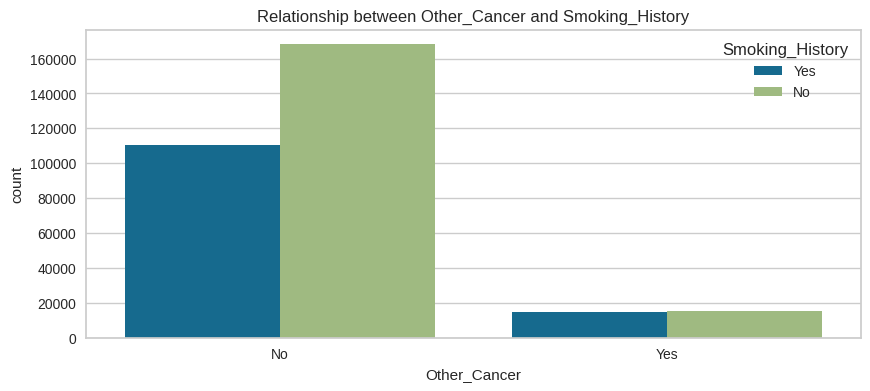

In [922]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="Smoking_History")
plt.title("Relationship between Other_Cancer and Smoking_History")
plt.show()

In [923]:
print("Details about reviewers with Other_Cancer based on Smoking_History")
print("-"*75)
lst_S=["Yes","No"]
for i in lst_S:
    dataoc= len(df.loc[(df["Smoking_History"]==i)])
    data1oc = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["Smoking_History"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  Smoking_History ",i)

Details about reviewers with Other_Cancer based on Smoking_History
---------------------------------------------------------------------------
11 %  Smoking_History  Yes
8 %  Smoking_History  No


Observation:
* Other cancers are more common in patients with a history of smoking

**Diabetes Vs Variables**

1.Relationship between Diabetes and General_Health

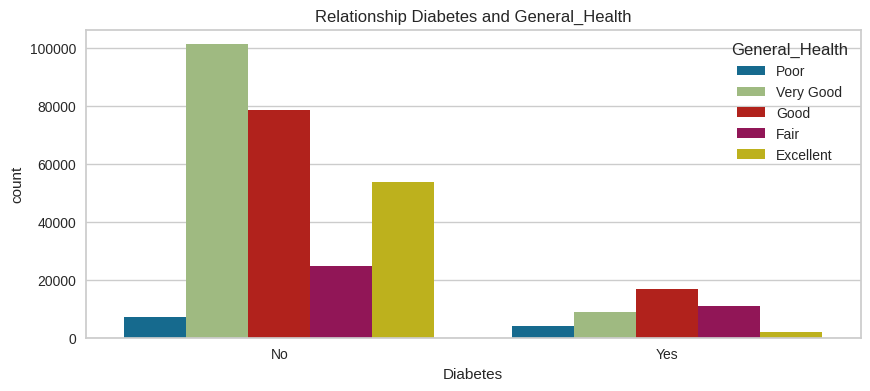

In [924]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="General_Health")
plt.title("Relationship Diabetes and General_Health")
plt.show()

In [925]:
print("Details about reviewers with Diabetes based on General_Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    datadg= len(df.loc[(df["General_Health"]==i)])
    data1dg = len(df.loc[(df["Diabetes"] == "Yes") & (df["General_Health"] == i)])
    percentdg = (data1dg * 100) // datadg
    print(percentdg, "%  General_Health ",i)

Details about reviewers with Diabetes based on General_Health
---------------------------------------------------------------------------
37 %  General_Health  Poor
8 %  General_Health  Very Good
17 %  General_Health  Good
30 %  General_Health  Fair
3 %  General_Health  Excellent


Observation:
* Diabetes is higher in people with health conditions poor & fair categories


2.Relationship between Diabetes and General_Health

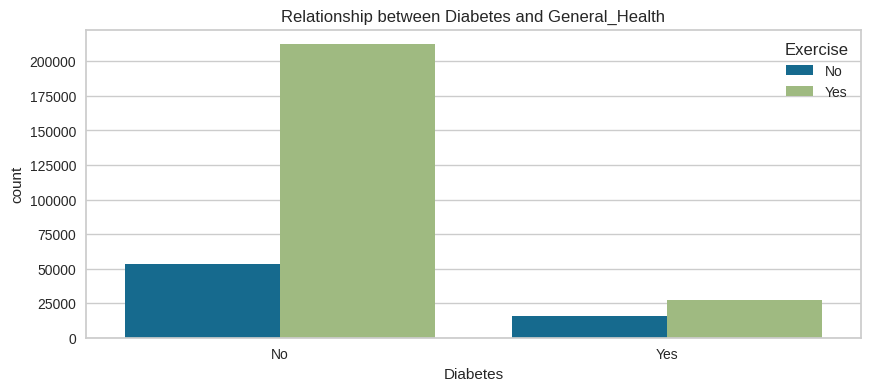

In [926]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="Exercise")
plt.title("Relationship between Diabetes and General_Health")
plt.show()

In [927]:
print("Details about reviewers with Diabetes based on Exercise")
print("-"*75)
lst_G=["Yes","No"]
for i in lst_G:
    datadg= len(df.loc[(df["Exercise"]==i)])
    data1dg = len(df[(df["Diabetes"] == "Yes") & (df["Exercise"] == i)])
    percentdg = (data1dg * 100) // datadg
    print(percentdg, "%  Exercise ",i)

Details about reviewers with Diabetes based on Exercise
---------------------------------------------------------------------------
11 %  Exercise  Yes
22 %  Exercise  No


Observation:
* Diabetes is double in reviewers who dont do exercise.

3.Relationship between Diabetes and Sex

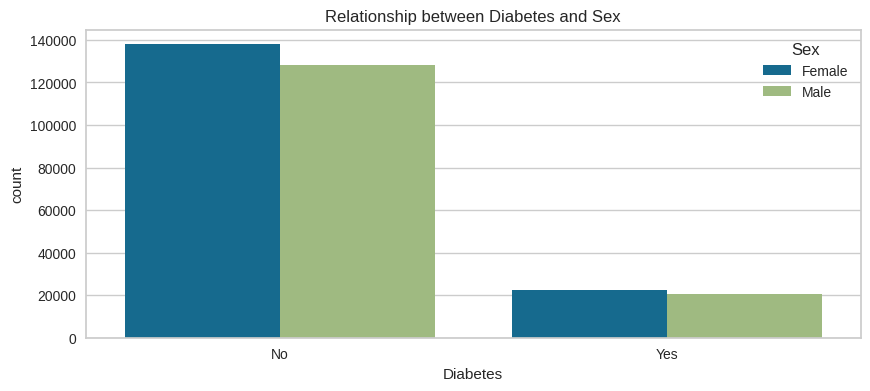

In [928]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="Sex")
plt.title("Relationship between Diabetes and Sex")
plt.show()

In [929]:
print("Details about reviewers with Diabetes based on Sex")
print("-"*75)
lst_S=["Male","Female"]
for i in lst_S:
    datadg= len(df.loc[(df["Sex"]==i)])
    data1dg = len(df[(df["Diabetes"] == "Yes") & (df["Sex"] == i)])
    percentdg = (data1dg * 100) // datadg
    print(percentdg, "%  Sex ",i)

Details about reviewers with Diabetes based on Sex
---------------------------------------------------------------------------
13 %  Sex  Male
13 %  Sex  Female


Observation:
* There is not much difference in based on sex

4.Relationship between Diabetes and Age_Category

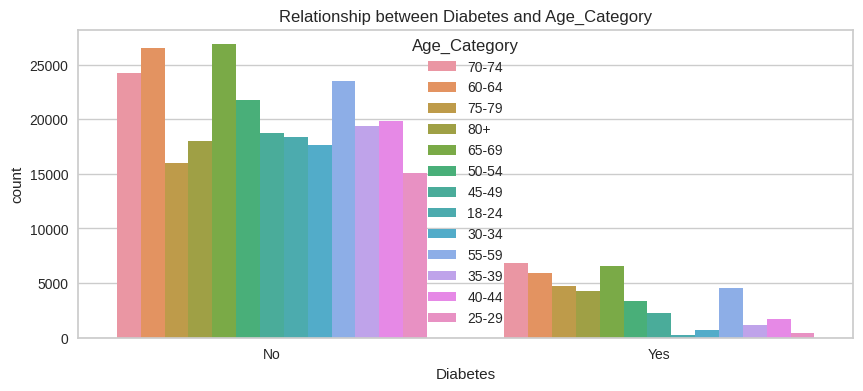

In [930]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="Age_Category")
plt.title("Relationship between Diabetes and Age_Category")
plt.show()

In [931]:
age_cato1 = df.loc[df["Diabetes"]=="Yes"].groupby("Age_Category") ["Diabetes"].count().sort_values(ascending=False)
age_cato1

Age_Category
70-74    6860
65-69    6579
60-64    5907
75-79    4726
55-59    4585
80+      4238
50-54    3316
45-49    2255
40-44    1720
35-39    1194
30-34     743
25-29     424
18-24     269
Name: Diabetes, dtype: int64

In [932]:
print("Details about reviewers with Diabetes based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    dataoc= len(df.loc[(df["Age_Category"]==i)])
    data1oc = len(df[(df["Diabetes"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Diabetes based on Age_Category
---------------------------------------------------------------------------
22 %  Age_Category  70-74
18 %  Age_Category  60-64
22 %  Age_Category  75-79
19 %  Age_Category  80+
19 %  Age_Category  65-69
13 %  Age_Category  50-54
10 %  Age_Category  45-49
1 %  Age_Category  18-24
4 %  Age_Category  30-34
16 %  Age_Category  55-59
5 %  Age_Category  35-39
7 %  Age_Category  40-44
2 %  Age_Category  25-29


Observations:
* diabetes increases with age
* most common above 45++ age category
* Maximum above 70++

5.Relationship between Diabetes and Smoking_History

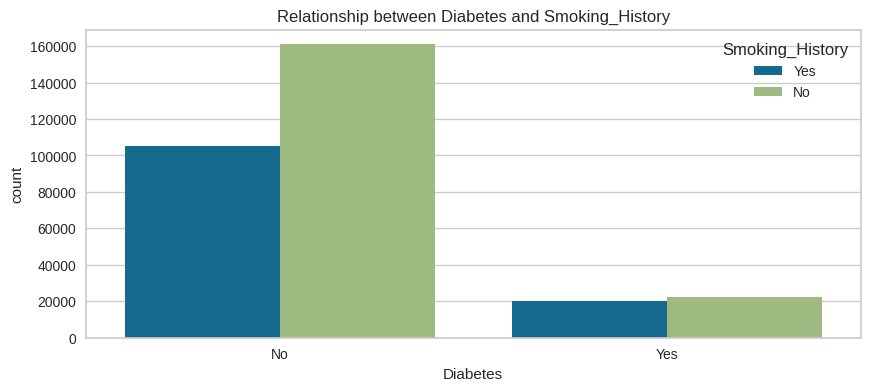

In [933]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="Smoking_History")
plt.title("Relationship between Diabetes and Smoking_History")
plt.show()

In [934]:
print("Details about reviewers with Diabetes based on Smoking_History")
print("-"*75)
lst_S=["Yes","No"]
for i in lst_S:
    datadg= len(df.loc[(df["Smoking_History"]==i)])
    data1dg = len(df[(df["Diabetes"] == "Yes") & (df["Smoking_History"] == i)])
    percentdg = (data1dg * 100) // datadg
    print(percentdg, "%  Smoking_History ",i)

Details about reviewers with Diabetes based on Smoking_History
---------------------------------------------------------------------------
16 %  Smoking_History  Yes
12 %  Smoking_History  No


Observation:
* Diabetes is higher with patients with smoking history

**Arthritis Vs Variables**

1.Relationship between Arthritis and General_Health

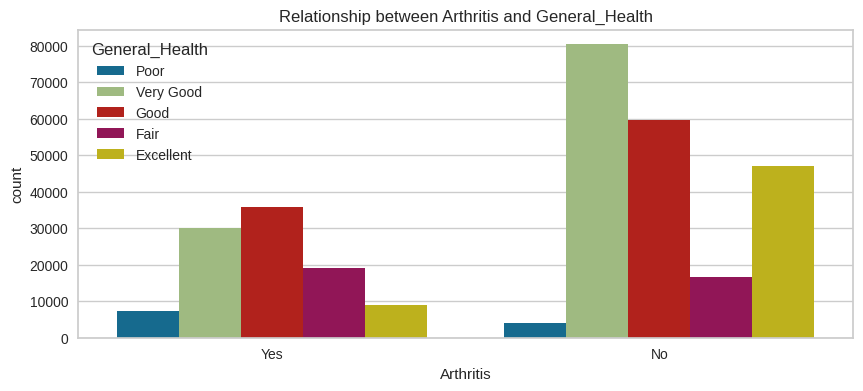

In [935]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="General_Health")
plt.title("Relationship between Arthritis and General_Health")
plt.show()

In [936]:
print("Details about reviewers with Arthritis based on General_Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    data= len(df.loc[(df["General_Health"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["General_Health"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "%  General_Health ",i)

Details about reviewers with Arthritis based on General_Health
---------------------------------------------------------------------------
64 %  General_Health  Poor
27 %  General_Health  Very Good
37 %  General_Health  Good
53 %  General_Health  Fair
15 %  General_Health  Excellent


2.Relationship between Arthritis and Exercise

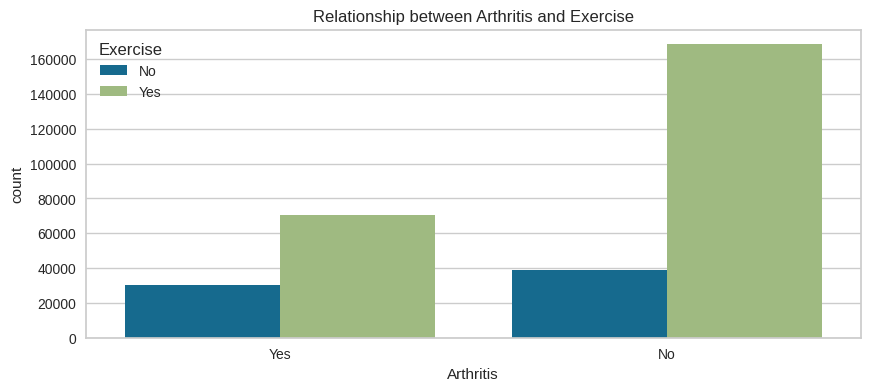

In [937]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="Exercise")
plt.title("Relationship between Arthritis and Exercise")
plt.show()

In [938]:
print("Details about reviewers with Arthritis based on Exercise")
print("-"*75)
lst_A=["Yes","No"]
for i in lst_A:
    data= len(df.loc[(df["Exercise"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "%  Exercise ",i)

Details about reviewers with Arthritis based on Exercise
---------------------------------------------------------------------------
29 %  Exercise  Yes
43 %  Exercise  No


3.Relationship between Arthritis and Sex

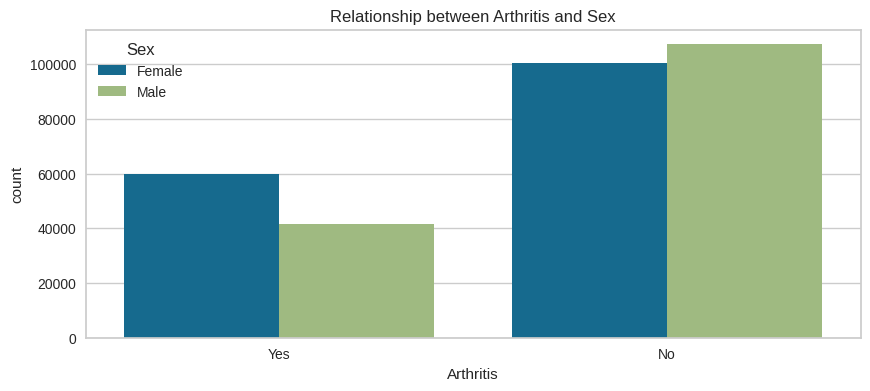

In [939]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="Sex")
plt.title("Relationship between Arthritis and Sex")
plt.show()

In [940]:
print("Details about reviewers with Arthritis based on Sex")
print("-"*75)
lst_E=["Male","Female"]
for i in lst_E:
    data= len(df.loc[(df["Sex"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["Sex"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "%  Sex ",i)

Details about reviewers with Arthritis based on Sex
---------------------------------------------------------------------------
27 %  Sex  Male
37 %  Sex  Female


4.Relationship between Arthritis and Age_Category

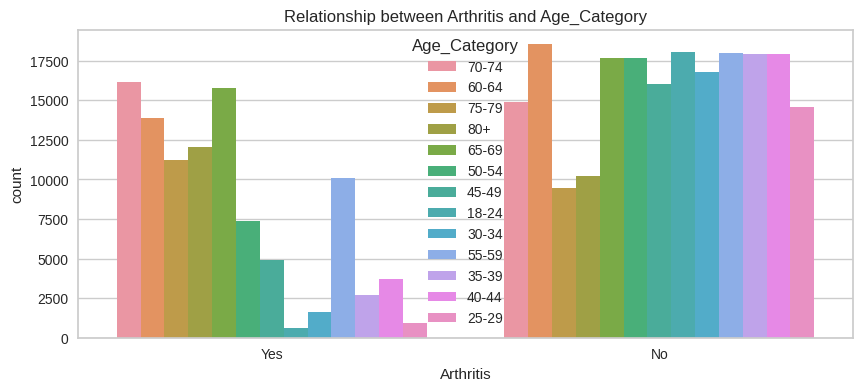

In [941]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="Age_Category")
plt.title("Relationship between Arthritis and Age_Category")
plt.show()

In [942]:
age_cato4 = df.loc[df["Diabetes"]=="Yes"].groupby("Age_Category") ["Diabetes"].count().sort_values(ascending=False)
age_cato4

Age_Category
70-74    6860
65-69    6579
60-64    5907
75-79    4726
55-59    4585
80+      4238
50-54    3316
45-49    2255
40-44    1720
35-39    1194
30-34     743
25-29     424
18-24     269
Name: Diabetes, dtype: int64

In [943]:
print("Details about reviewers with Arthritis based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    data= len(df.loc[(df["Age_Category"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Arthritis based on Age_Category
---------------------------------------------------------------------------
2 %  Age_Category  70-74
2 %  Age_Category  60-64
2 %  Age_Category  75-79
2 %  Age_Category  80+
2 %  Age_Category  65-69
2 %  Age_Category  50-54
2 %  Age_Category  45-49
2 %  Age_Category  18-24
2 %  Age_Category  30-34
2 %  Age_Category  55-59
2 %  Age_Category  35-39
2 %  Age_Category  40-44
2 %  Age_Category  25-29


Observation:
* arthritis increases with age, which is most common in the 75-79 age category

**5.Relationship between Arthritis and Smoking_History**

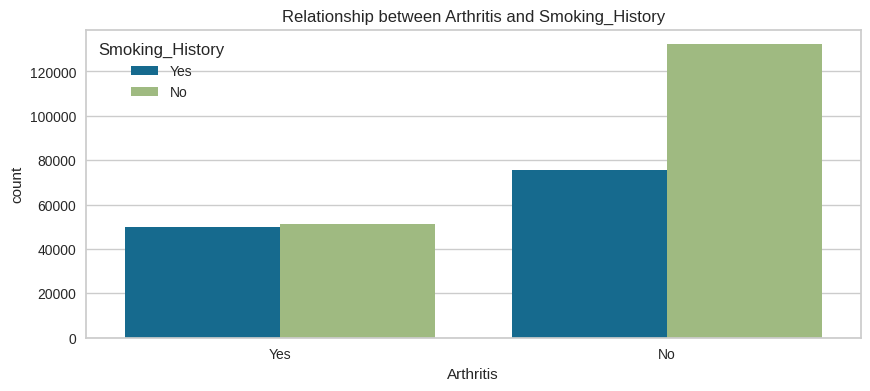

In [944]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="Smoking_History")
plt.title("Relationship between Arthritis and Smoking_History")
plt.show()

In [945]:
print("Details about reviewers with Arthritis based on Smoking_History")
print("-"*75)
lst_E=["Yes","No"]
for i in lst_E:
    data= len(df.loc[(df["Smoking_History"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["Smoking_History"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "%  Smoking_History ",i)

Details about reviewers with Arthritis based on Smoking_History
---------------------------------------------------------------------------
39 %  Smoking_History  Yes
27 %  Smoking_History  No


Observation:
* Arthritis is slightly higher in patients with a history of smoking.

<Axes: >

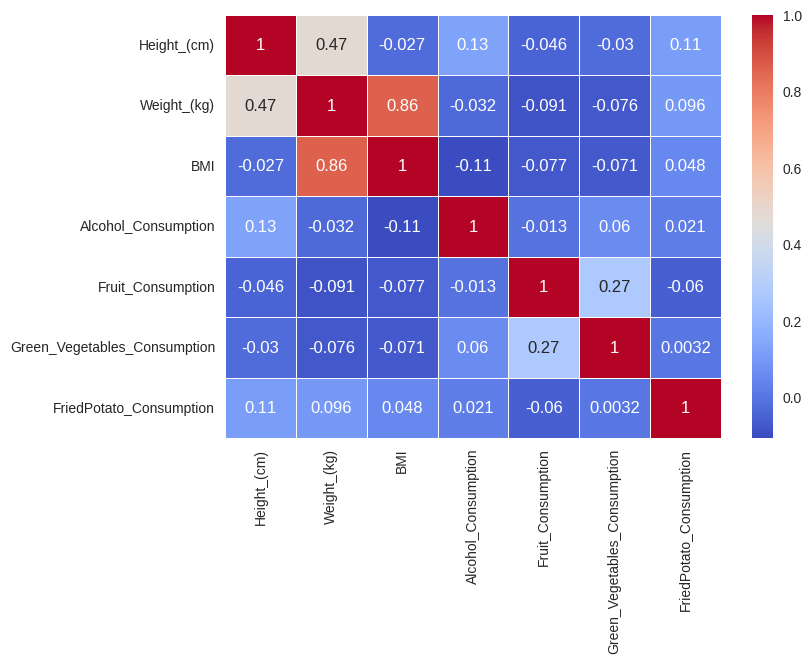

In [946]:
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap="coolwarm")

This shows the correlation between numerical values.In which height-weight,weight-BMI,fruit_consumption-vegitable consumptions shows positive cor relations.

**Extracting details about patients having any one of the disorder**

In [947]:
any_1 = df.loc[(df["Heart_Disease"]=="Yes")|(df["Skin_Cancer"]=="Yes")|(df["Other_Cancer"]=="Yes")|(df["Depression"]=="Yes")|(df["Diabetes"]=="Yes")|(df["Arthritis"]=="Yes")]


In [948]:
any_1.duplicated().sum()

0

In [949]:
len(any_1)

176638

In [950]:
percentage_a =len(any_1)*100//len(df)
print(percentage_a)

57


Result:Total 57 percentage of reviewers have atleast 1 kind of disorder

**Extracting details about patients who have both depression and heart disorders.**

<Axes: xlabel='Heart_Disease', ylabel='count'>

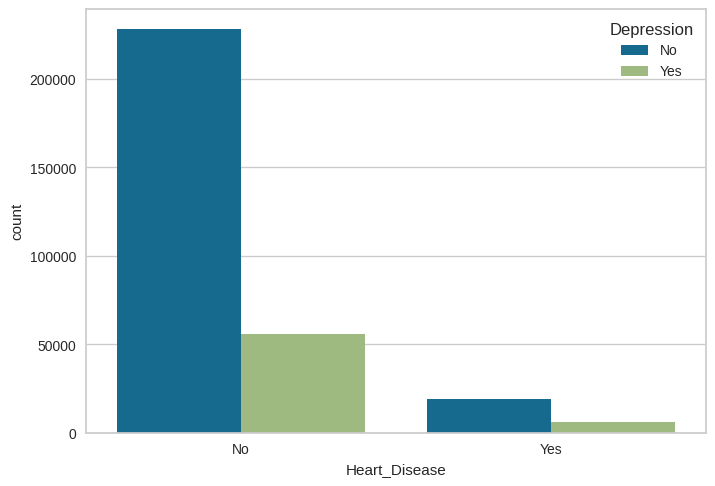

In [951]:
sns.countplot(x='Heart_Disease', hue='Depression', data=df)

In [952]:
h_d = df.loc[(df["Heart_Disease"]=="Yes")&(df["Depression"]=="Yes")]
len(h_d)

6101

In [953]:
h = df.loc[df["Heart_Disease"]=="Yes"]
pe =print("percentge of heart_disorder due to depression",len(h_d)*100//len(h))

percentge of heart_disorder due to depression 24


Observations:
* 24 percentge of heart_disorder is due to depression
* 6101 people have both heart disorder and depression

**Extracting details about patients who have both arthritis and heart disorders.**

<Axes: xlabel='Arthritis', ylabel='count'>

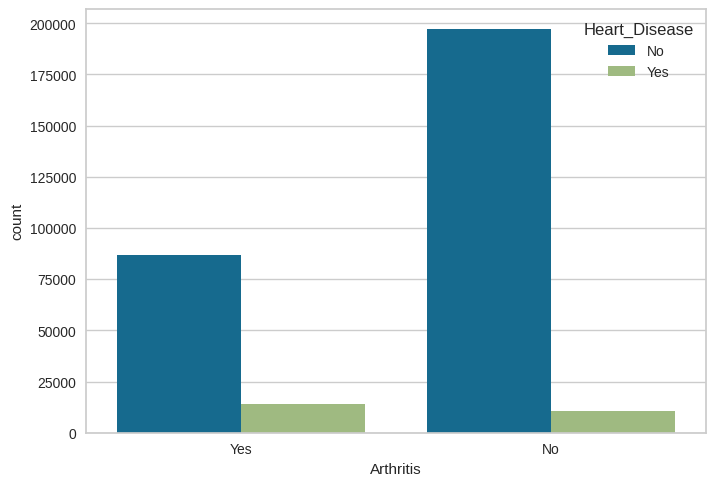

In [954]:
sns.countplot(x='Arthritis', hue='Heart_Disease', data=df)

In [955]:
c_a = df.loc[(df["Heart_Disease"]=="Yes")&(df["Arthritis"])]
len(c_a)

24971

**Extracting details about patients who have both skin_cancer and heart disorders**

<Axes: xlabel='Skin_Cancer', ylabel='count'>

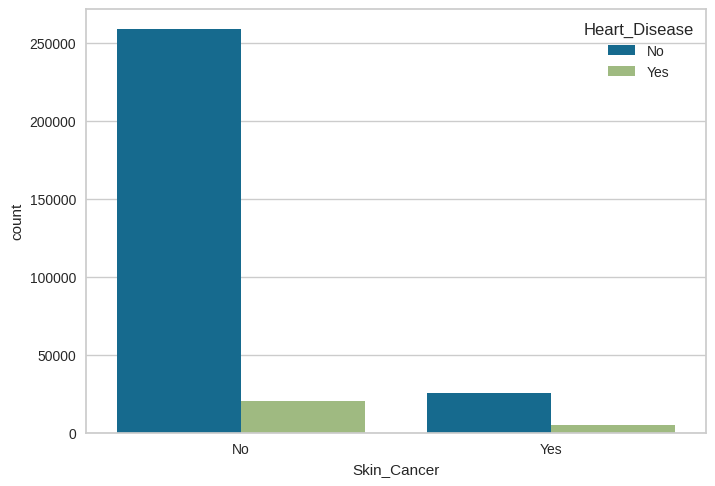

In [956]:
sns.countplot(x='Skin_Cancer', hue='Heart_Disease', data=df)

In [957]:
S_H = df.loc[(df["Heart_Disease"]=="Yes")&(df["Skin_Cancer"])]
len(S_H)

24971

**Extracting details about patients who have both other cancer and heart disorders**

<Axes: xlabel='Other_Cancer', ylabel='count'>

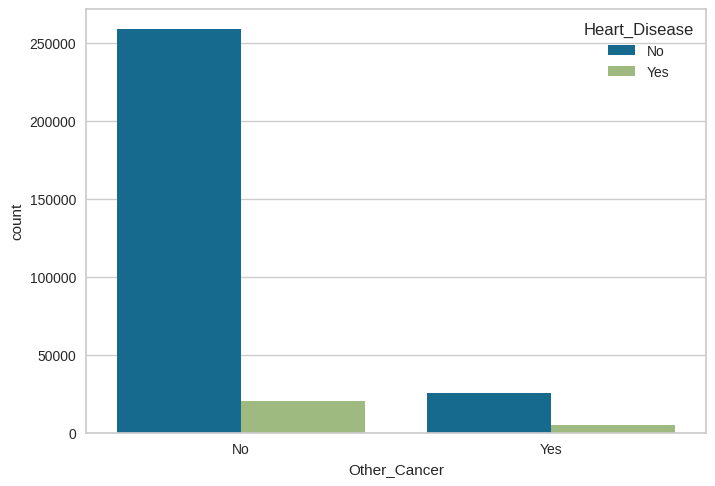

In [958]:
sns.countplot(x='Other_Cancer', hue='Heart_Disease', data=df)

**Extracting details about patients who have both diabetes and heart disorders**

<Axes: xlabel='Diabetes', ylabel='count'>

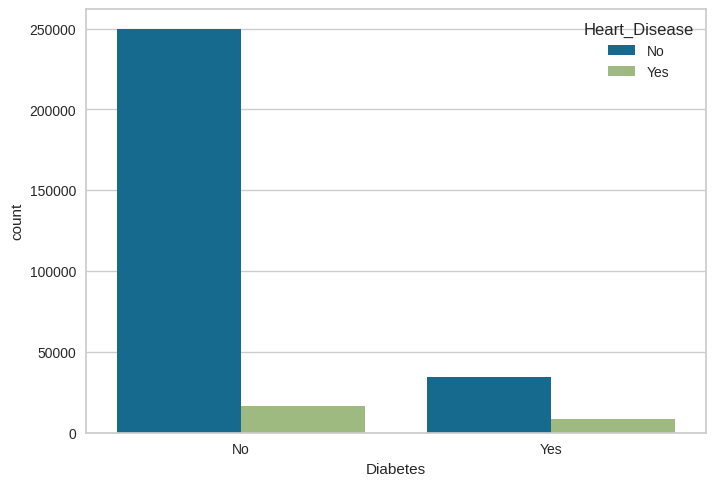

In [959]:
sns.countplot(x='Diabetes', hue='Heart_Disease', data=df)

In [960]:
D_H = df.loc[(df["Heart_Disease"]=="Yes")&(df["Diabetes"])]
len(D_H)

24971

In [961]:
df["Age_Category"].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [962]:
df["Age_Category"].replace(['80+','75-79','70-74','65-69','60-64','55-59', '50-54', '45-49','40-44','35-39','30-34', '25-29','18-24'], [12,11,10,9,8,7,6,5,4,3,2,1,0],inplace=True)

In [963]:
df.columns.unique()

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [964]:
# df["Heart_Disease"]=df["Heart_Disease"].replace(["Yes","No","nan"],["1","0","0"])
# df["Skin_Cancer"]=df["Skin_Cancer"].replace(["Yes","No","nan"],["1","0","0"])
# df["Exercise"]=df["Exercise"].replace(["Yes","No","nan"],["1","0","0"])
# df["Other_Cancer"]=df["Other_Cancer"].replace(["Yes","No","nan"],["1","0","0"])
# df["Depression"]=df["Depression"].replace(["Yes","No","nan"],["1","0","0"])
# df["Diabetes"]=df["Diabetes"].replace(["Yes","No","nan"],["1","0","0"])
# df["Arthritis"]=df["Arthritis"].replace(["Yes","No","nan"],["1","0","0"])
# df["Smoking_History"]=df["Smoking_History"].replace(["Yes","No","nan"],["1","0","0"])
# df["Sex"]=df["Sex"].replace(["Female","Male","nan"],["1","0","0"])

In [965]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,10,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,10,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,8,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,11,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,12,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [966]:
# 'Exercise', 'Heart_Disease', 'Skin_Cancer','Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History'
df1=pd.get_dummies(df[['General_Health', 'Checkup','Exercise', 'Heart_Disease', 'Skin_Cancer','Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History']],drop_first=True)
df1

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
308850,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
308851,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1
308852,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [967]:
dfe=pd.concat([df,df1],axis=1)
dfe

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,0,0,0,0,0,0,0,1,0,1
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,1,0,1,0,0,0,1,0,0,0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,1,1,0,0,0,0,1,0,0,0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,1,1,1,0,0,0,1,0,1,0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,1,1,0,0,0,0,0,0,1,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,...,0,1,0,0,0,0,1,0,1,0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,Yes,No,Female,...,0,1,0,0,0,1,1,0,0,1
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,1,1,0,0,0,0,0,0,1,0


In [968]:
dfe.Diabetes.unique()

array(['No', 'Yes'], dtype=object)

In [969]:
dfe=dfe.drop(['General_Health', 'Checkup','Exercise', 'Heart_Disease', 'Skin_Cancer','Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History'],axis=1)# 'Exercise', 'Heart_Disease', 'Skin_Cancer','Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History'
dfe

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
0,10,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,10,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,8,163.0,88.45,33.47,4.0,12.0,3.0,16.0,0,0,...,1,1,0,0,0,0,1,0,0,0
3,11,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0,0,...,1,1,1,0,0,0,1,0,1,0
4,12,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,1,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,168.0,81.65,29.05,4.0,30.0,8.0,0.0,0,0,...,1,1,0,0,0,0,0,0,1,0
308850,9,180.0,69.85,21.48,8.0,15.0,60.0,4.0,1,0,...,0,1,0,0,0,0,1,0,1,0
308851,2,157.0,61.23,24.69,4.0,40.0,8.0,4.0,0,0,...,0,1,0,0,0,1,1,0,0,1
308852,9,183.0,79.38,23.73,3.0,30.0,12.0,0.0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [970]:
dfe.shape

(308774, 25)

In [971]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308774 entries, 0 to 308853
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age_Category                     308774 non-null  int64  
 1   Height_(cm)                      308774 non-null  float64
 2   Weight_(kg)                      308774 non-null  float64
 3   BMI                              308774 non-null  float64
 4   Alcohol_Consumption              308774 non-null  float64
 5   Fruit_Consumption                308774 non-null  float64
 6   Green_Vegetables_Consumption     308774 non-null  float64
 7   FriedPotato_Consumption          308774 non-null  float64
 8   General_Health_Fair              308774 non-null  uint8  
 9   General_Health_Good              308774 non-null  uint8  
 10  General_Health_Poor              308774 non-null  uint8  
 11  General_Health_Very Good         308774 non-null  uint8  
 12  Ch

In [972]:
# sd=['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer','Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History']
# df[]

In [973]:
dfe.columns

Index(['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_Never',
       'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years',
       'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes',
       'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_Yes',
       'Arthritis_Yes', 'Sex_Male', 'Smoking_History_Yes'],
      dtype='object')

In [974]:
# df["Heart_Disease"]=df["Heart_Disease"].astype(int)
# df["Skin_Cancer"]=df["Skin_Cancer"].astype(int)
# df["Exercise"]=df["Exercise"].astype(int)
# df["Other_Cancer"]=df["Other_Cancer"].astype(int)
# df["Depression"]=df["Depression"].astype(int)
# df["Diabetes"]=df["Diabetes"].astype(int)
# df["Arthritis"]=df["Arthritis"].astype(int)
# df["Smoking_History"]=df["Smoking_History"].astype(int)
# df["Sex"]=df["Sex"].astype(int)

In [975]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308774 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308774 non-null  object 
 1   Checkup                       308774 non-null  object 
 2   Exercise                      308774 non-null  object 
 3   Heart_Disease                 308774 non-null  object 
 4   Skin_Cancer                   308774 non-null  object 
 5   Other_Cancer                  308774 non-null  object 
 6   Depression                    308774 non-null  object 
 7   Diabetes                      308774 non-null  object 
 8   Arthritis                     308774 non-null  object 
 9   Sex                           308774 non-null  object 
 10  Age_Category                  308774 non-null  int64  
 11  Height_(cm)                   308774 non-null  float64
 12  Weight_(kg)                   308774 non-nul

In [976]:
dfe.head()

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
0,10,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,10,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,8,163.0,88.45,33.47,4.0,12.0,3.0,16.0,0,0,...,1,1,0,0,0,0,1,0,0,0
3,11,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0,0,...,1,1,1,0,0,0,1,0,1,0
4,12,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,1,...,1,0,0,0,0,0,0,0,1,1


In [977]:
dfe.tail()

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
308849,1,168.0,81.65,29.05,4.0,30.0,8.0,0.0,0,0,...,1,1,0,0,0,0,0,0,1,0
308850,9,180.0,69.85,21.48,8.0,15.0,60.0,4.0,1,0,...,0,1,0,0,0,0,1,0,1,0
308851,2,157.0,61.23,24.69,4.0,40.0,8.0,4.0,0,0,...,0,1,0,0,0,1,1,0,0,1
308852,9,183.0,79.38,23.73,3.0,30.0,12.0,0.0,0,0,...,1,1,0,0,0,0,0,0,1,0
308853,5,160.0,81.19,31.71,1.0,5.0,12.0,1.0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [978]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308774 entries, 0 to 308853
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age_Category                     308774 non-null  int64  
 1   Height_(cm)                      308774 non-null  float64
 2   Weight_(kg)                      308774 non-null  float64
 3   BMI                              308774 non-null  float64
 4   Alcohol_Consumption              308774 non-null  float64
 5   Fruit_Consumption                308774 non-null  float64
 6   Green_Vegetables_Consumption     308774 non-null  float64
 7   FriedPotato_Consumption          308774 non-null  float64
 8   General_Health_Fair              308774 non-null  uint8  
 9   General_Health_Good              308774 non-null  uint8  
 10  General_Health_Poor              308774 non-null  uint8  
 11  General_Health_Very Good         308774 non-null  uint8  
 12  Ch

In [979]:
dfe.isna().sum()

Age_Category                       0
Height_(cm)                        0
Weight_(kg)                        0
BMI                                0
Alcohol_Consumption                0
Fruit_Consumption                  0
Green_Vegetables_Consumption       0
FriedPotato_Consumption            0
General_Health_Fair                0
General_Health_Good                0
General_Health_Poor                0
General_Health_Very Good           0
Checkup_Never                      0
Checkup_Within the past 2 years    0
Checkup_Within the past 5 years    0
Checkup_Within the past year       0
Exercise_Yes                       0
Heart_Disease_Yes                  0
Skin_Cancer_Yes                    0
Other_Cancer_Yes                   0
Depression_Yes                     0
Diabetes_Yes                       0
Arthritis_Yes                      0
Sex_Male                           0
Smoking_History_Yes                0
dtype: int64

# **CLUSTERING**

In this dataset applying Clustering bcs it can assist in grouping patients with similar medical profiles/health conditions which will help in personalized medicine.

In [980]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init="k-means++",random_state=42)
  data.fit(dfe)
  wcss.append(data.inertia_)

In [981]:
print(wcss)

[496859174.918334, 349602827.95511395, 269954623.2863722, 244085433.15059668, 220599756.23182848, 205362815.13114315, 192026628.71115124, 180103405.23844343, 171137321.97016442, 163569195.7533782]


In [982]:
len(wcss)

10

Text(0, 0.5, 'Variance')

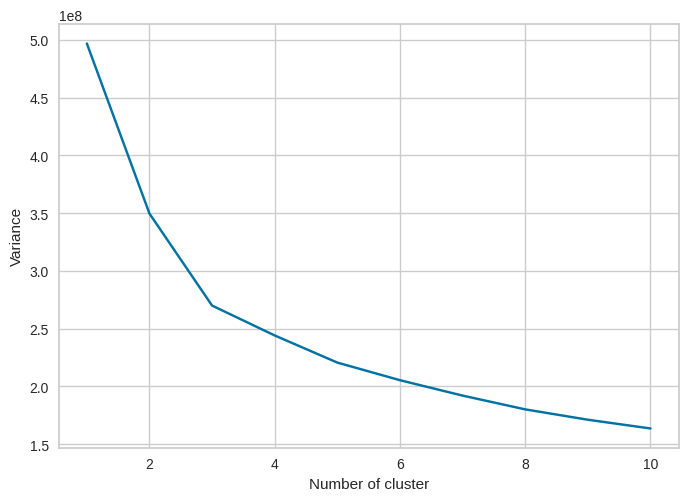

In [983]:
lst=[i for i in range(1,11)]
plt.plot(lst,wcss)
plt.xlabel("Number of cluster")
plt.ylabel("Variance")

Visually its very difficult to choose exact elbow point so finding out the elbow point with the help of yellobricks library

Elbow Method to determine the number of clusters to be formed:


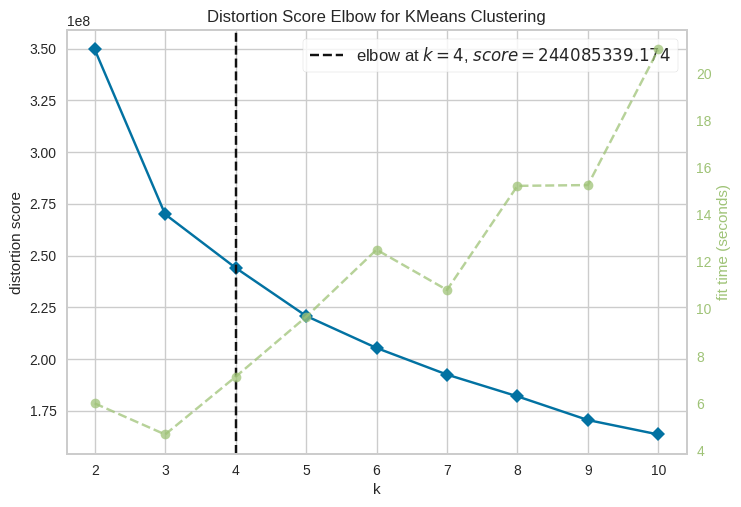

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [984]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(dfe)
Elbow_M.show()

In [985]:
data1=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_data=data1.fit_predict(dfe)
y_data

array([0, 0, 3, ..., 0, 3, 3], dtype=int32)

In [986]:
dfe['cluster']=y_data
dfe

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes,cluster
0,10,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,10,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,8,163.0,88.45,33.47,4.0,12.0,3.0,16.0,0,0,...,1,0,0,0,0,1,0,0,0,3
3,11,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0,0,...,1,1,0,0,0,1,0,1,0,3
4,12,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,1,...,0,0,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,168.0,81.65,29.05,4.0,30.0,8.0,0.0,0,0,...,1,0,0,0,0,0,0,1,0,3
308850,9,180.0,69.85,21.48,8.0,15.0,60.0,4.0,1,0,...,1,0,0,0,0,1,0,1,0,2
308851,2,157.0,61.23,24.69,4.0,40.0,8.0,4.0,0,0,...,1,0,0,0,1,1,0,0,1,0
308852,9,183.0,79.38,23.73,3.0,30.0,12.0,0.0,0,0,...,1,0,0,0,0,0,0,1,0,3


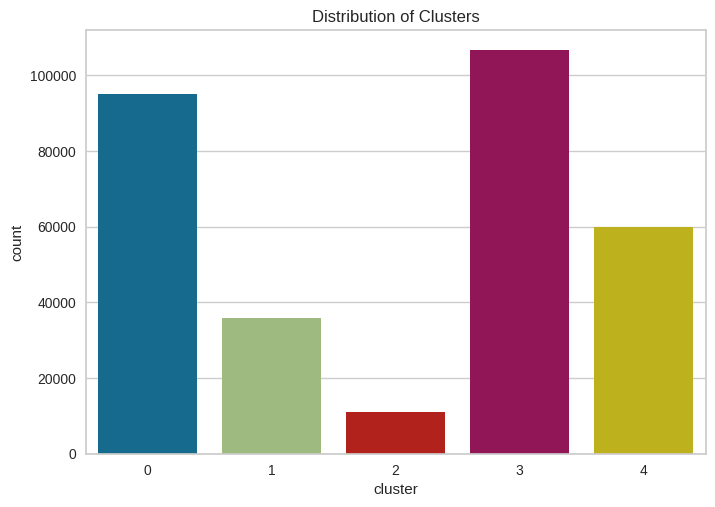

In [987]:
sns.countplot(x=dfe["cluster"],data=dfe)
plt.title("Distribution of Clusters")
plt.show()

**cluster3>cluster0>cluster4>cluster1>cluster2**

In [988]:
dfe.cluster.unique()

array([0, 3, 1, 4, 2], dtype=int32)

In [989]:
dfe.columns

Index(['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_Never',
       'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years',
       'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes',
       'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_Yes',
       'Arthritis_Yes', 'Sex_Male', 'Smoking_History_Yes', 'cluster'],
      dtype='object')

# **OUTLIER HANDLING IN EACH CLUSTERS**

In [990]:
c0 = dfe.loc[dfe["cluster"]==0]
c0

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes,cluster
0,10,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,10,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0,0,...,0,1,0,0,0,1,0,0,0,0
6,8,175.0,69.85,22.74,0.0,16.0,8.0,0.0,1,0,...,1,1,0,0,0,0,1,1,1,0
8,9,163.0,72.57,27.46,0.0,12.0,12.0,4.0,1,0,...,0,0,0,0,1,0,0,0,1,0
10,11,160.0,74.84,29.23,0.0,30.0,20.0,2.0,1,0,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308843,6,175.0,61.23,19.94,0.0,30.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,1,0,0
308844,8,163.0,65.32,24.72,8.0,4.0,4.0,2.0,0,1,...,1,0,0,0,0,0,0,1,0,0
308847,4,163.0,65.77,24.89,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
308848,7,168.0,58.97,20.98,0.0,16.0,12.0,0.0,0,1,...,1,0,0,0,0,0,0,1,0,0


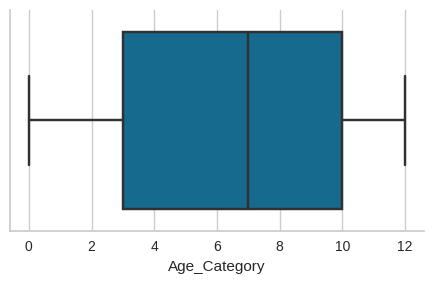

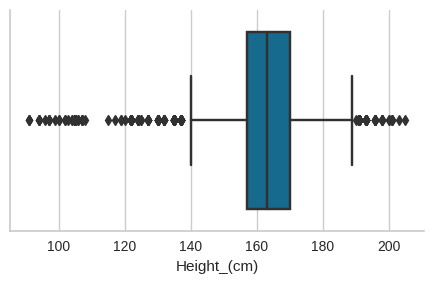

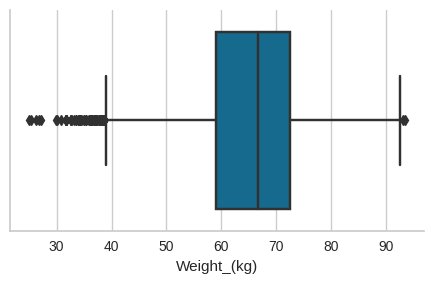

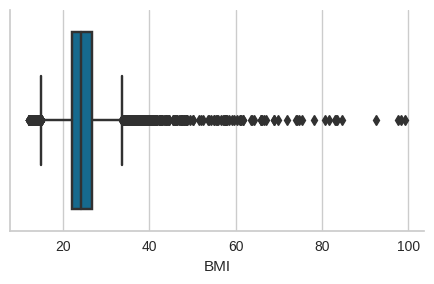

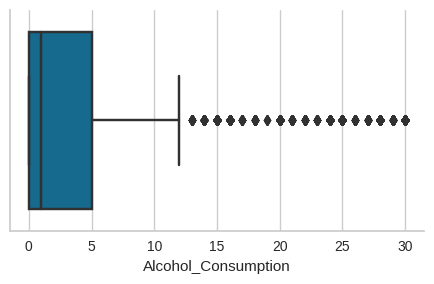

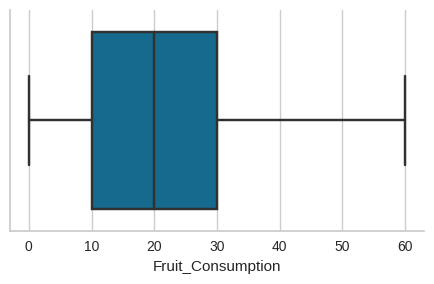

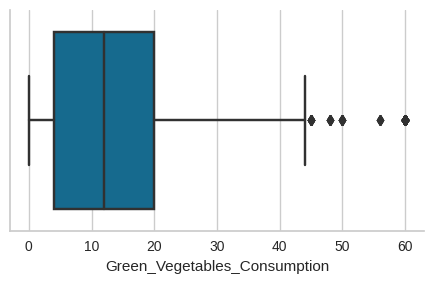

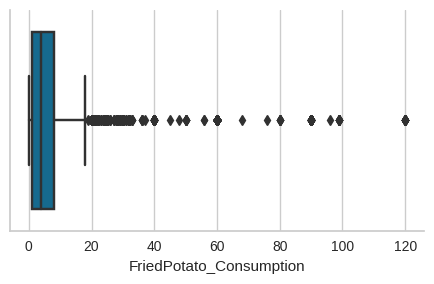

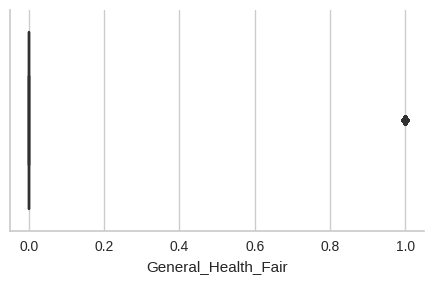

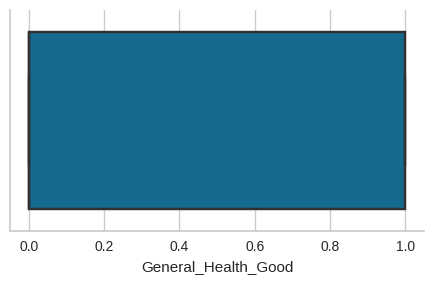

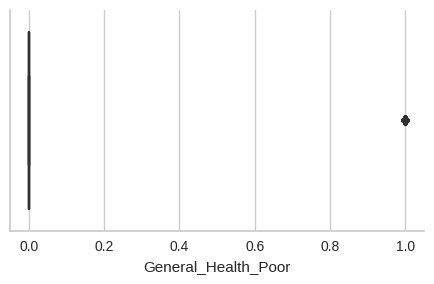

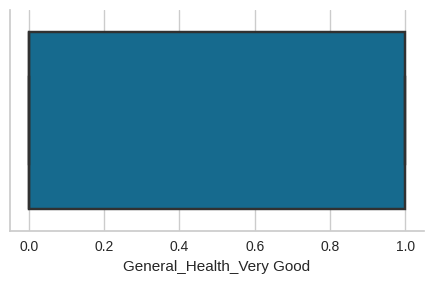

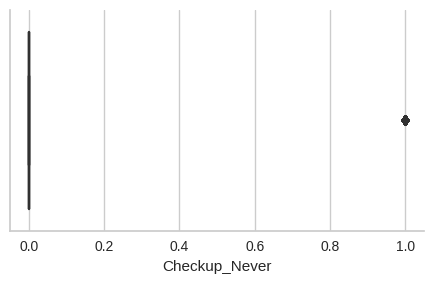

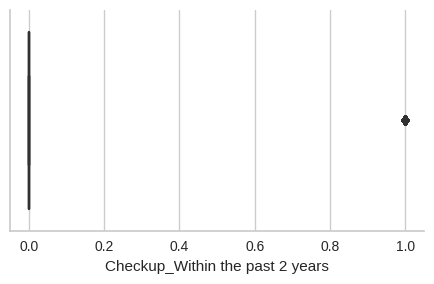

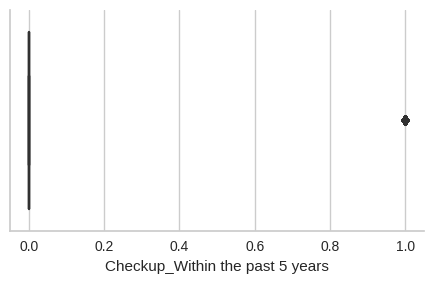

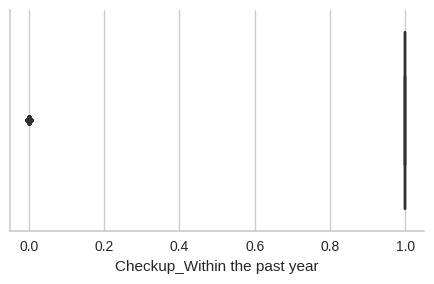

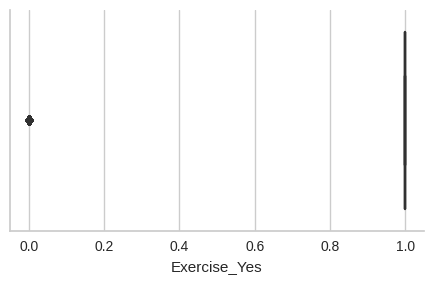

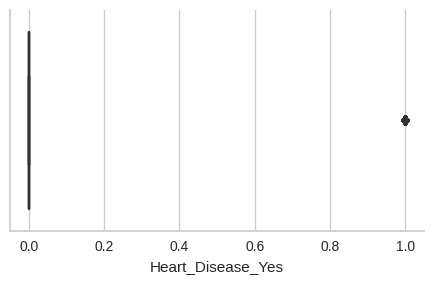

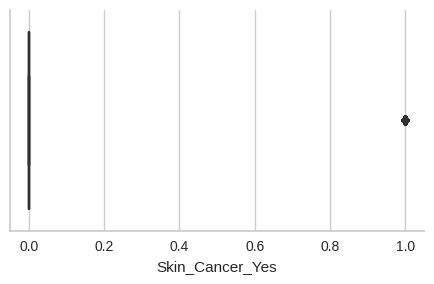

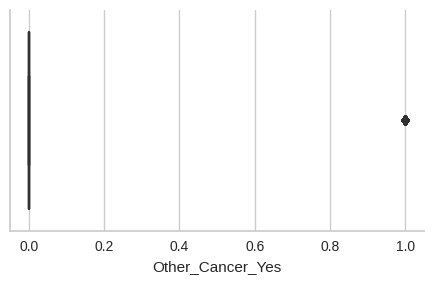

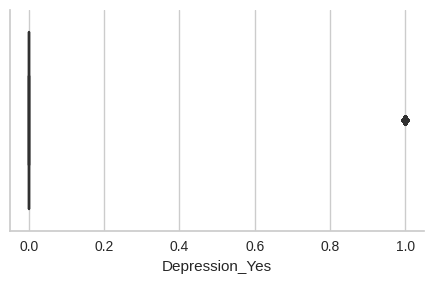

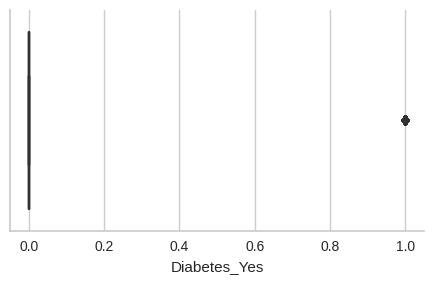

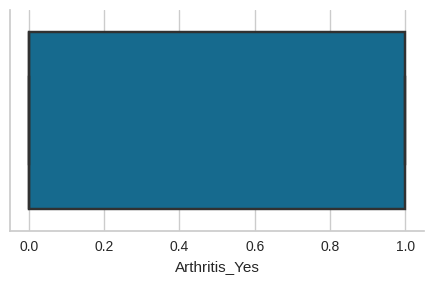

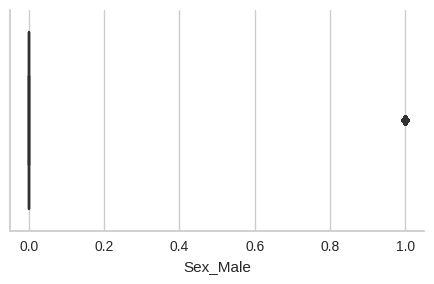

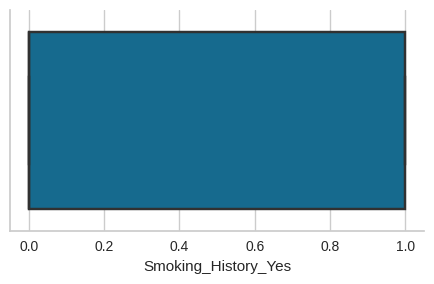

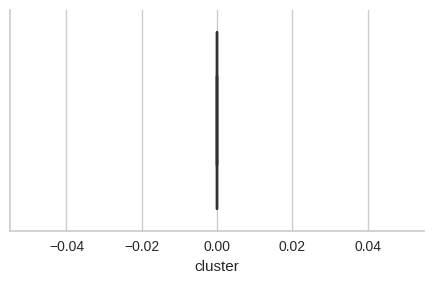

In [991]:
for i in c0.columns:
  g = sns.FacetGrid(c0,height=3,aspect=1.5)
  g = g.map(sns.boxplot, i)

In [992]:
from scipy import stats
z_scores = stats.zscore(c0)
abs_z_scores = np.abs(z_scores)
outlier_indices0 = (abs_z_scores > 3).any(axis=1) #threshold=3

In [993]:
c0_cleaned = c0[~outlier_indices0]
c0_cleaned.shape

(67500, 26)

In [994]:
print(len(c0)-len(c0_cleaned))

27656


In [995]:
c1 = dfe.loc[dfe["cluster"]==1]
c1

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes,cluster
5,8,183.0,154.22,46.11,0.0,12.0,12.0,12.0,0,1,...,0,0,0,0,1,0,1,1,0,1
7,9,165.0,108.86,39.94,3.0,30.0,8.0,8.0,0,1,...,1,0,0,0,0,0,1,0,1,1
13,9,178.0,113.40,35.87,4.0,2.0,3.0,4.0,1,0,...,0,0,1,0,0,0,0,1,1,1
15,10,163.0,116.12,43.94,0.0,8.0,8.0,4.0,1,0,...,0,0,0,0,0,1,1,0,0,1
22,2,180.0,124.74,38.35,0.0,2.0,4.0,12.0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308822,3,180.0,131.54,40.45,0.0,1.0,20.0,1.0,1,0,...,1,0,0,0,1,0,0,1,0,1
308825,3,175.0,136.08,44.30,2.0,30.0,7.0,8.0,0,1,...,0,0,0,0,0,0,0,1,0,1
308827,1,170.0,117.48,40.56,4.0,6.0,2.0,5.0,1,0,...,1,0,0,0,0,0,0,0,0,1
308839,6,168.0,113.40,40.35,0.0,30.0,4.0,8.0,0,1,...,1,0,0,0,0,0,0,0,0,1


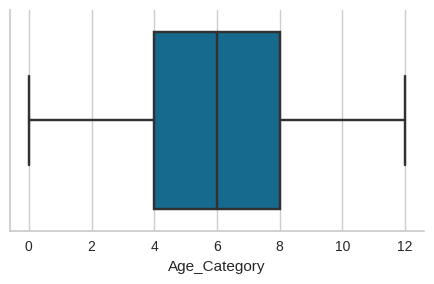

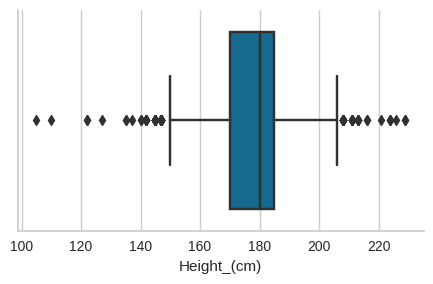

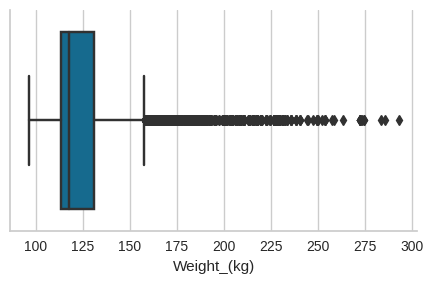

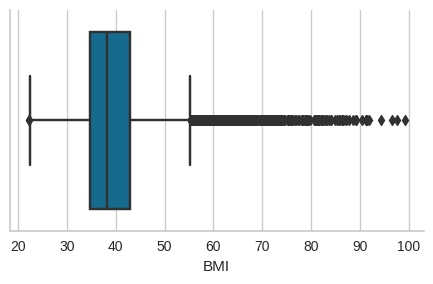

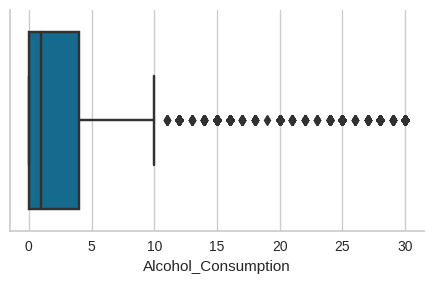

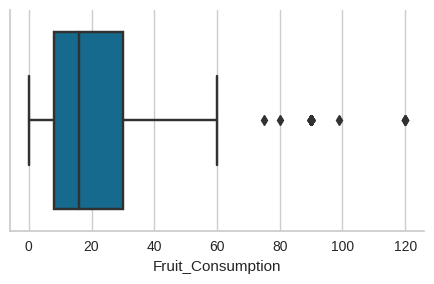

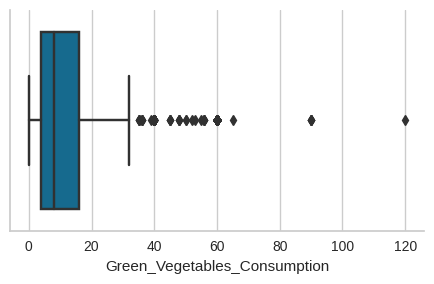

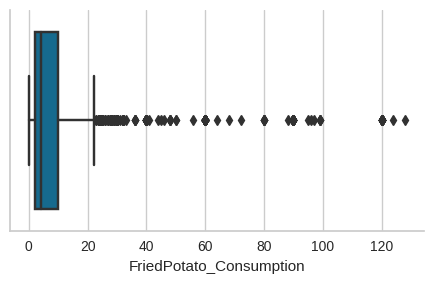

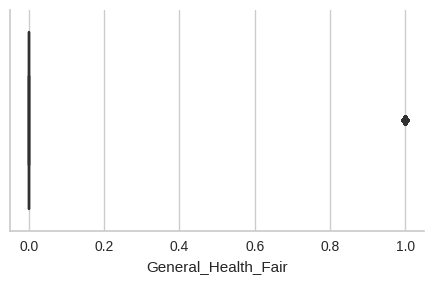

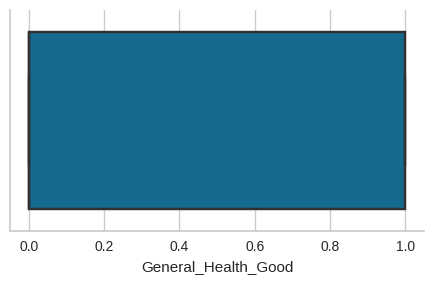

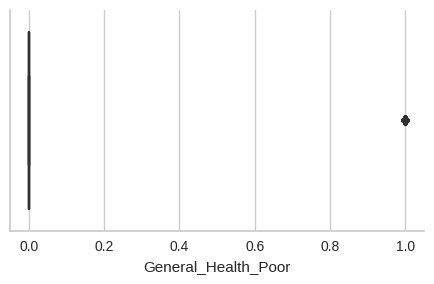

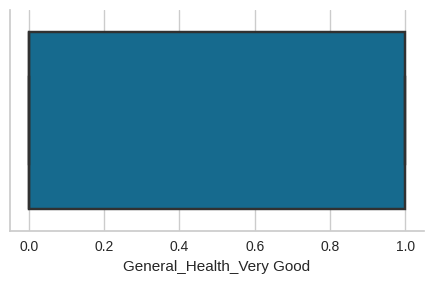

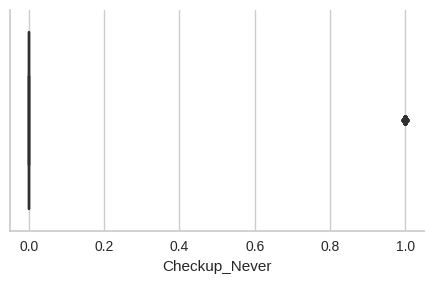

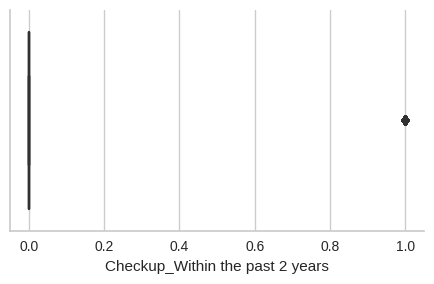

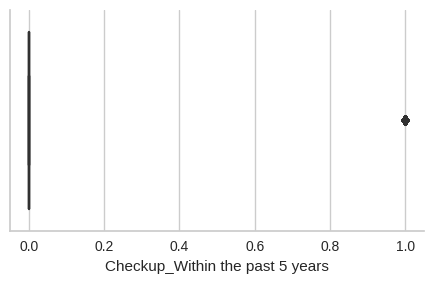

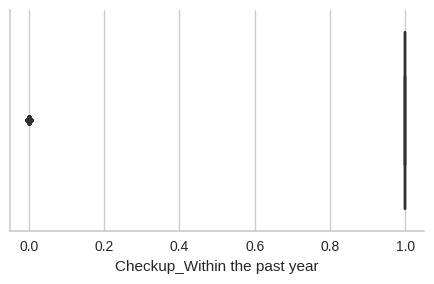

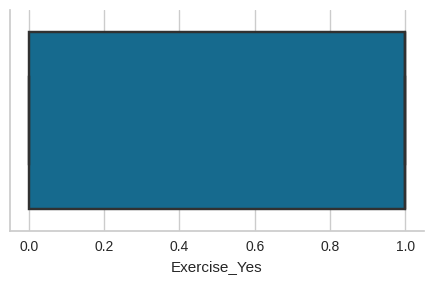

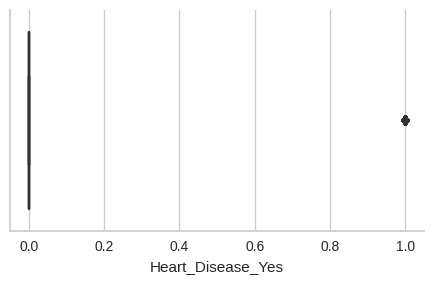

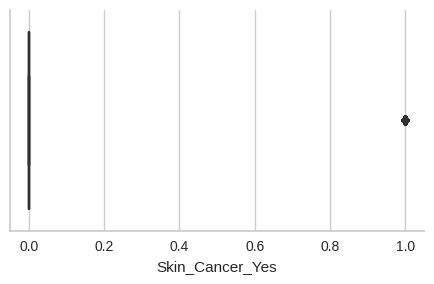

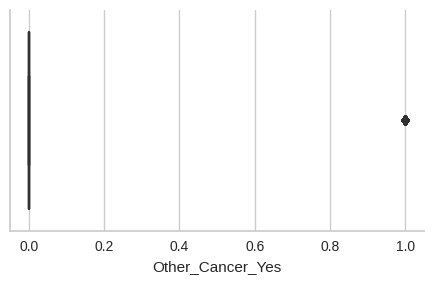

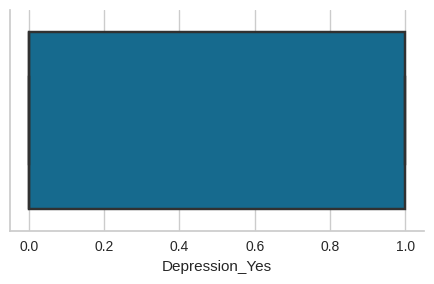

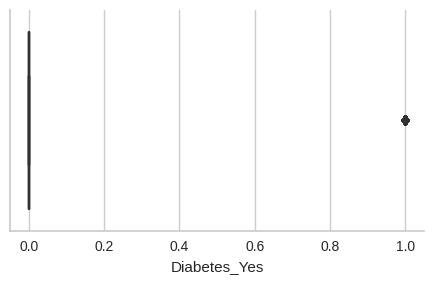

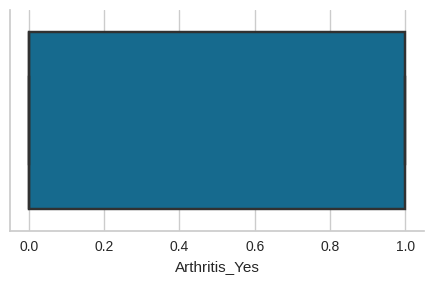

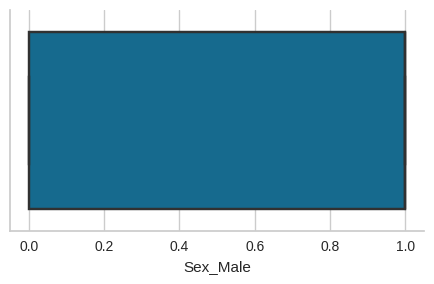

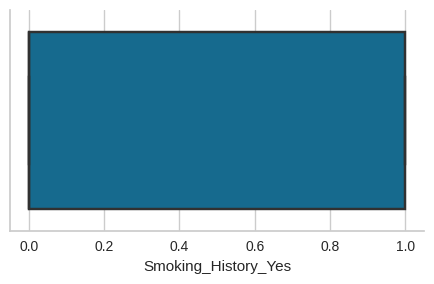

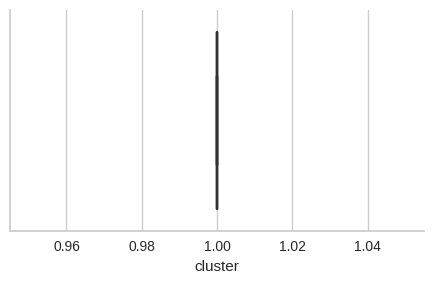

In [996]:
for i in c1.columns:
  g = sns.FacetGrid(c1,height=3,aspect=1.5)
  g = g.map(sns.boxplot,i)

In [997]:
from scipy import stats
z_scores = stats.zscore(c1)
abs_z_scores = np.abs(z_scores)
outlier_indices1 = (abs_z_scores > 3).any(axis=1)

In [998]:
c1_cleaned = c1[~outlier_indices1]
c1_cleaned

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes,cluster
5,8,183.0,154.22,46.11,0.0,12.0,12.0,12.0,0,1,...,0,0,0,0,1,0,1,1,0,1
7,9,165.0,108.86,39.94,3.0,30.0,8.0,8.0,0,1,...,1,0,0,0,0,0,1,0,1,1
15,10,163.0,116.12,43.94,0.0,8.0,8.0,4.0,1,0,...,0,0,0,0,0,1,1,0,0,1
22,2,180.0,124.74,38.35,0.0,2.0,4.0,12.0,0,0,...,1,0,0,0,0,0,0,0,0,1
28,10,191.0,112.49,31.00,0.0,30.0,10.0,15.0,0,0,...,1,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308815,8,180.0,115.67,35.56,25.0,20.0,4.0,5.0,0,0,...,0,0,0,0,0,0,1,1,0,1
308822,3,180.0,131.54,40.45,0.0,1.0,20.0,1.0,1,0,...,1,0,0,0,1,0,0,1,0,1
308825,3,175.0,136.08,44.30,2.0,30.0,7.0,8.0,0,1,...,0,0,0,0,0,0,0,1,0,1
308827,1,170.0,117.48,40.56,4.0,6.0,2.0,5.0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [999]:
print(len(c1)-len(c1_cleaned))

12808


In [1000]:
c2 =  dfe.loc[dfe["cluster"]==2]
c2

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes,cluster
51,10,178.0,88.45,27.98,0.0,8.0,60.0,0.0,0,0,...,1,0,0,0,0,0,1,1,0,2
202,7,178.0,70.31,22.24,30.0,60.0,60.0,2.0,0,0,...,1,0,0,0,0,0,0,0,1,2
226,8,155.0,102.06,42.51,0.0,60.0,60.0,0.0,0,1,...,0,0,0,0,0,1,1,0,0,2
282,5,170.0,50.80,17.54,10.0,30.0,60.0,8.0,0,0,...,1,0,0,0,0,0,0,0,0,2
313,12,173.0,75.30,25.24,30.0,30.0,60.0,0.0,0,1,...,1,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308784,8,165.0,70.31,25.79,0.0,60.0,60.0,1.0,0,1,...,1,0,0,0,0,0,0,0,0,2
308787,10,152.0,72.57,31.25,0.0,60.0,60.0,8.0,0,0,...,1,0,0,0,0,0,0,0,0,2
308817,9,180.0,68.04,20.92,10.0,30.0,60.0,3.0,1,0,...,0,0,0,0,0,0,0,1,0,2
308820,7,160.0,86.18,33.66,1.0,8.0,120.0,6.0,0,0,...,1,0,0,0,0,0,0,0,0,2


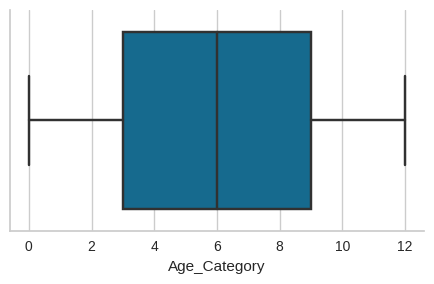

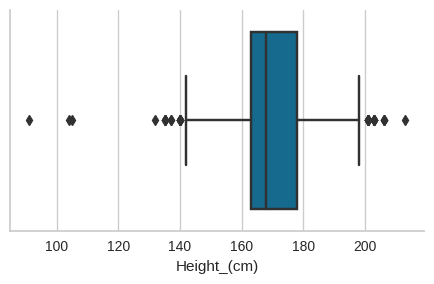

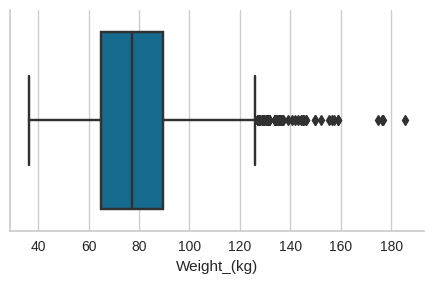

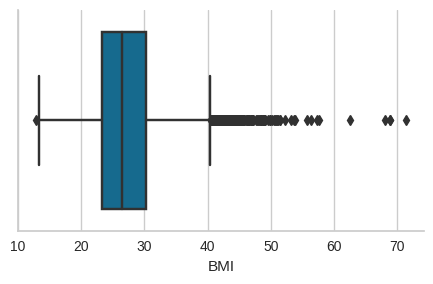

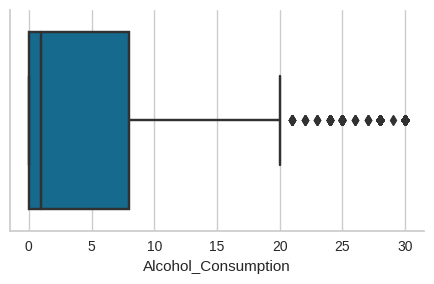

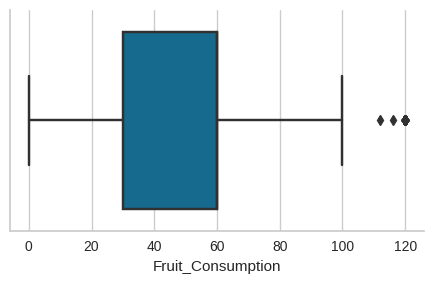

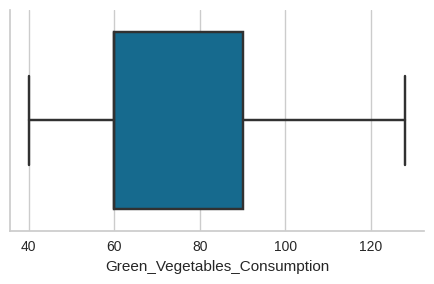

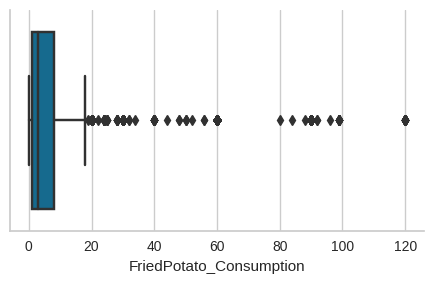

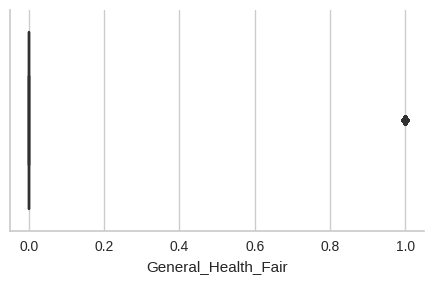

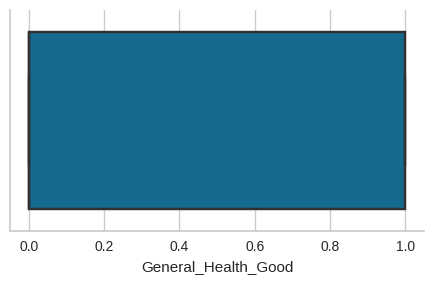

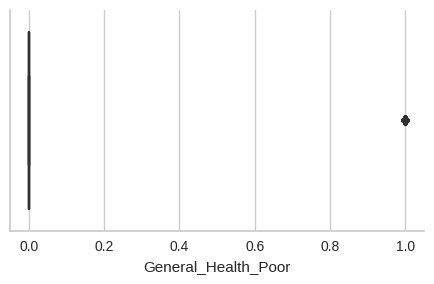

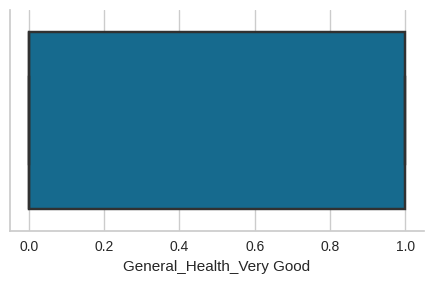

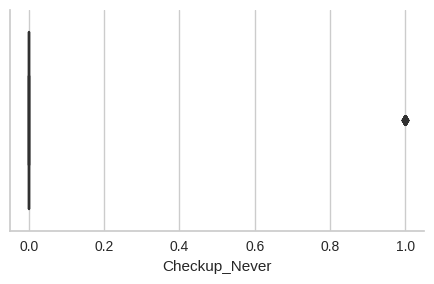

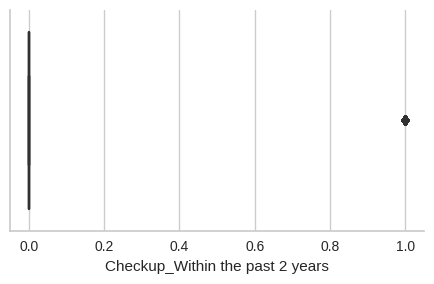

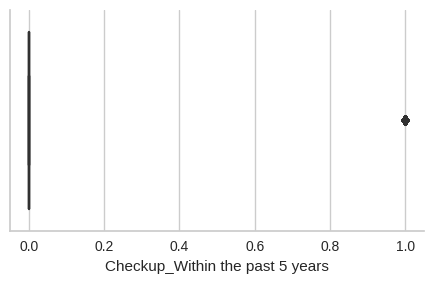

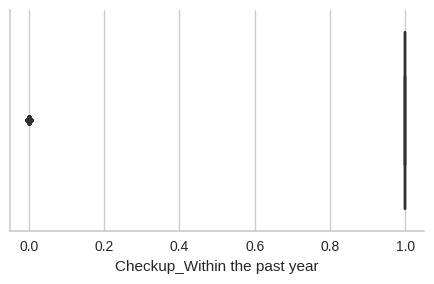

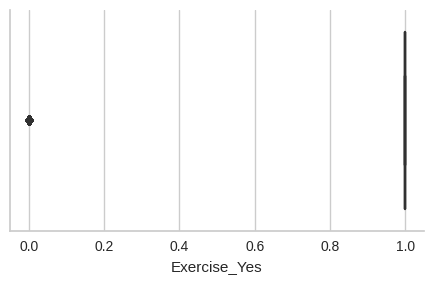

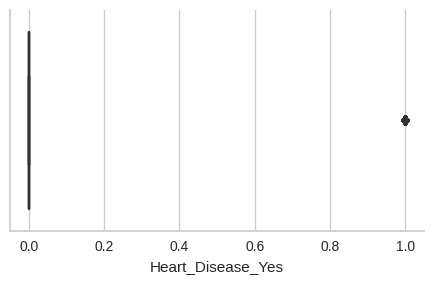

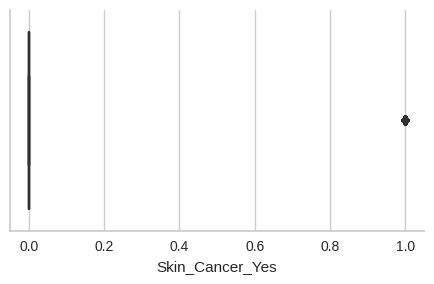

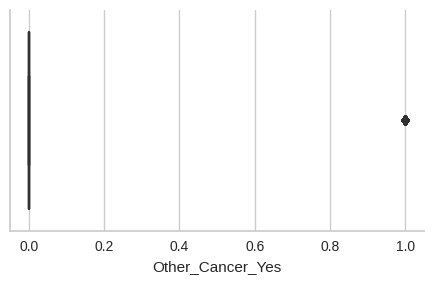

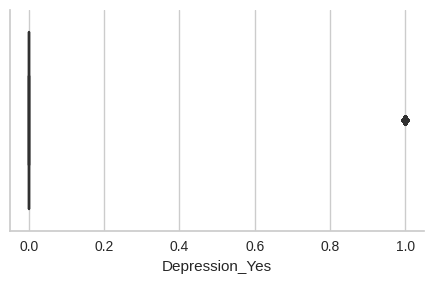

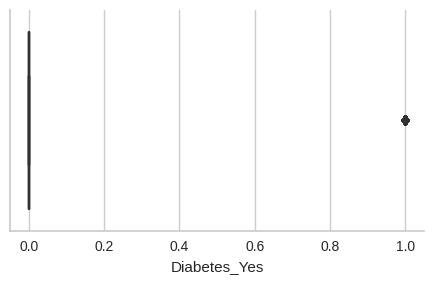

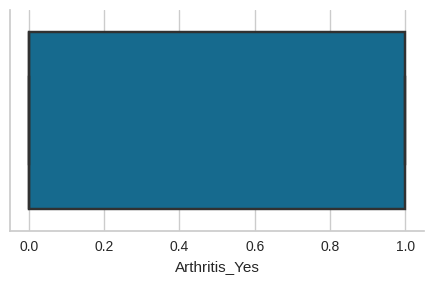

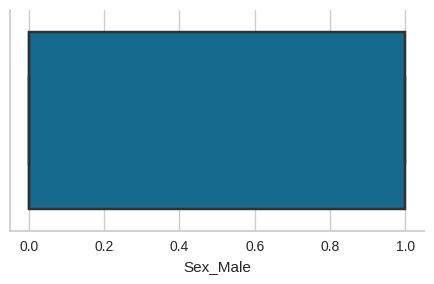

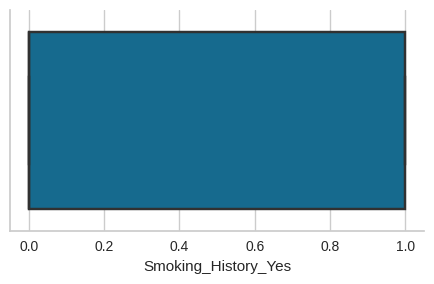

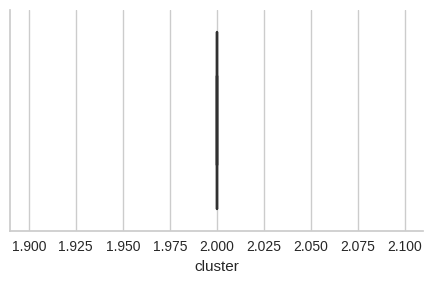

In [1001]:
for i in c2.columns:
  g = sns.FacetGrid(c2,height=3,aspect=1.5)
  g = g.map(sns.boxplot,i)

In [1002]:
from scipy import stats
z_scores = stats.zscore(c2)
abs_z_scores = np.abs(z_scores)
outlier_indices2 = (abs_z_scores > 3).any(axis=1)

In [1003]:
c2_cleaned = c2[~outlier_indices2]
c2_cleaned

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes,cluster
51,10,178.0,88.45,27.98,0.0,8.0,60.0,0.0,0,0,...,1,0,0,0,0,0,1,1,0,2
226,8,155.0,102.06,42.51,0.0,60.0,60.0,0.0,0,1,...,0,0,0,0,0,1,1,0,0,2
282,5,170.0,50.80,17.54,10.0,30.0,60.0,8.0,0,0,...,1,0,0,0,0,0,0,0,0,2
418,9,170.0,78.02,26.94,4.0,60.0,60.0,0.0,0,1,...,1,0,0,0,0,0,1,0,0,2
419,7,188.0,94.80,26.83,4.0,60.0,60.0,5.0,0,0,...,1,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308741,8,163.0,74.84,28.32,0.0,90.0,90.0,0.0,0,1,...,1,0,0,0,0,1,0,0,0,2
308762,8,157.0,79.38,32.01,0.0,90.0,60.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,2
308784,8,165.0,70.31,25.79,0.0,60.0,60.0,1.0,0,1,...,1,0,0,0,0,0,0,0,0,2
308787,10,152.0,72.57,31.25,0.0,60.0,60.0,8.0,0,0,...,1,0,0,0,0,0,0,0,0,2


In [1004]:
c3 = dfe.loc[dfe["cluster"]==3]
c3

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes,cluster
2,8,163.0,88.45,33.47,4.0,12.0,3.0,16.0,0,0,...,1,0,0,0,0,1,0,0,0,3
3,11,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0,0,...,1,1,0,0,0,1,0,1,0,3
4,12,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,1,...,0,0,0,0,0,0,0,1,1,3
9,10,163.0,91.63,34.67,0.0,12.0,12.0,1.0,1,0,...,0,0,0,0,0,1,1,0,0,3
11,11,175.0,73.48,23.92,0.0,2.0,8.0,30.0,1,0,...,0,1,1,0,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308845,7,170.0,104.33,36.02,4.0,12.0,20.0,4.0,0,1,...,1,0,0,0,0,0,0,1,0,3
308846,9,168.0,92.99,33.09,1.0,12.0,8.0,1.0,0,0,...,0,0,0,0,0,1,1,1,0,3
308849,1,168.0,81.65,29.05,4.0,30.0,8.0,0.0,0,0,...,1,0,0,0,0,0,0,1,0,3
308852,9,183.0,79.38,23.73,3.0,30.0,12.0,0.0,0,0,...,1,0,0,0,0,0,0,1,0,3


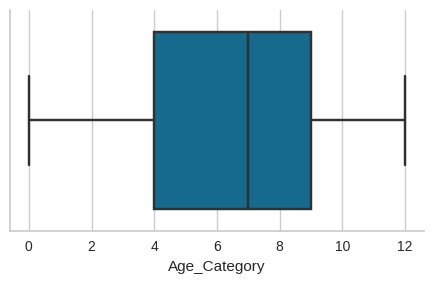

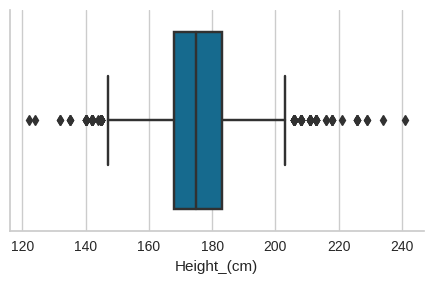

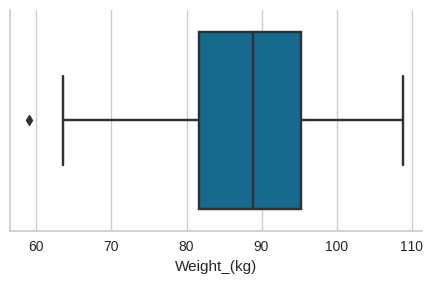

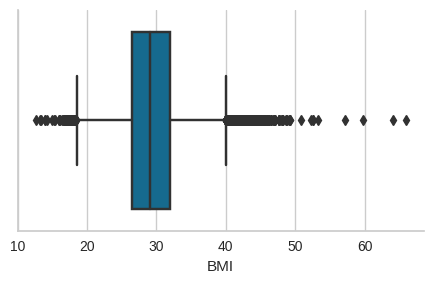

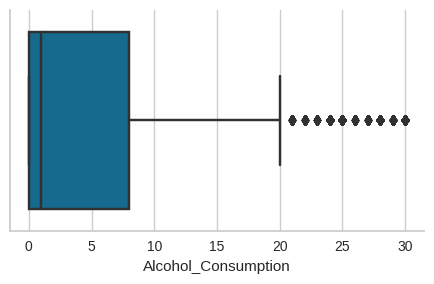

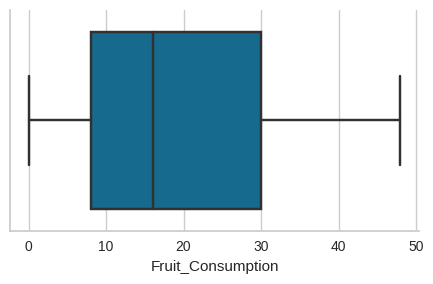

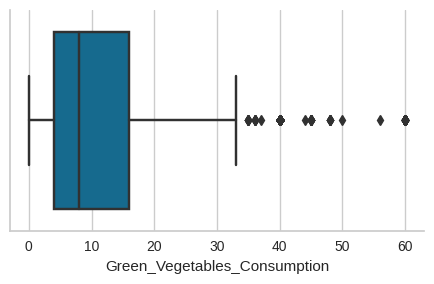

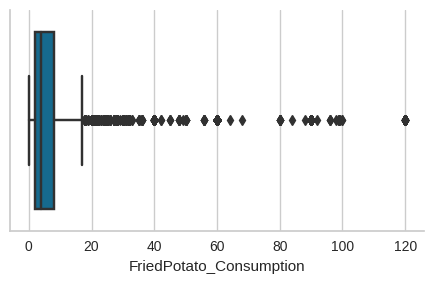

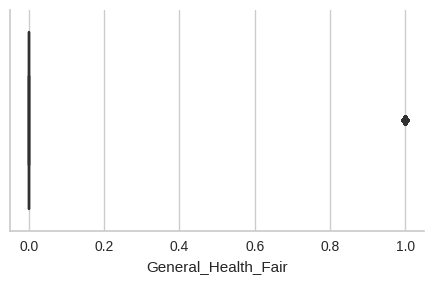

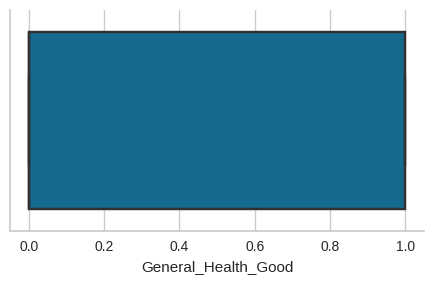

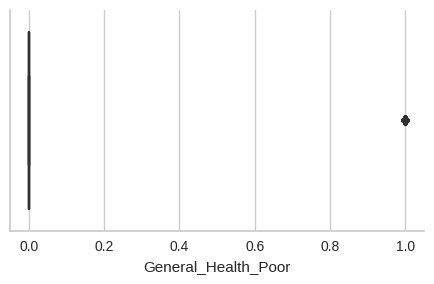

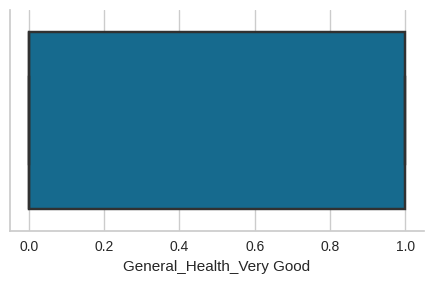

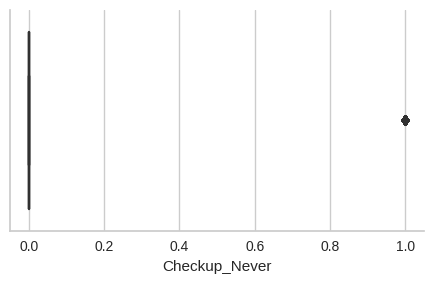

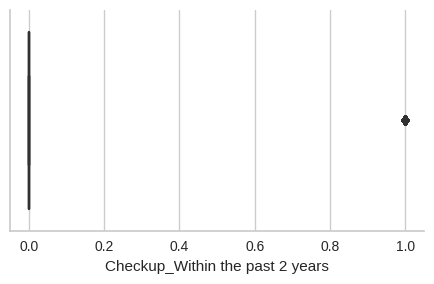

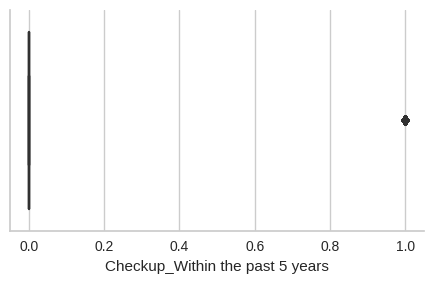

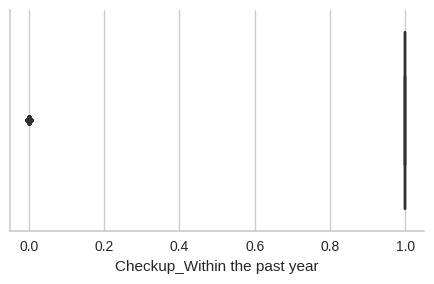

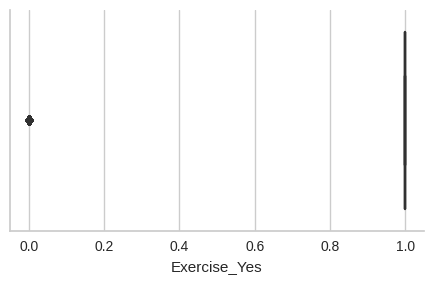

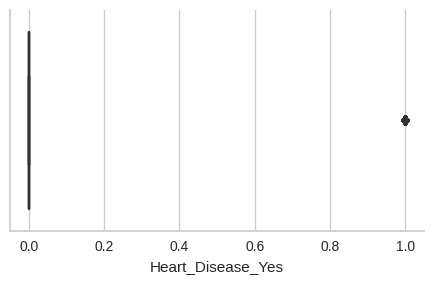

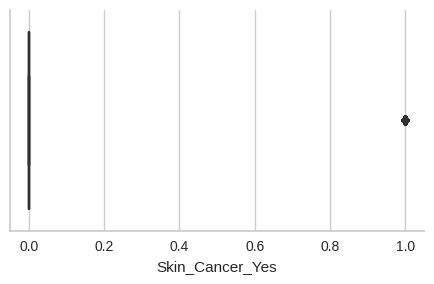

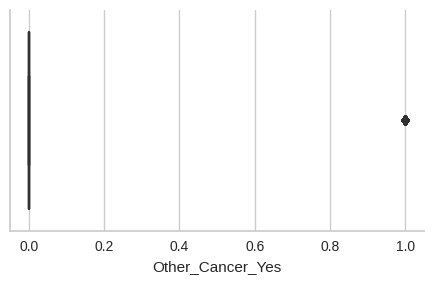

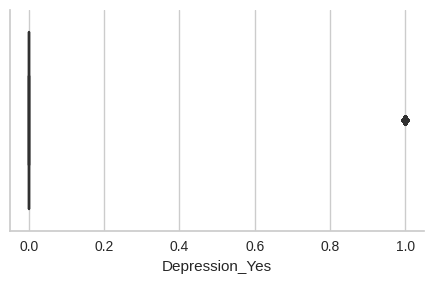

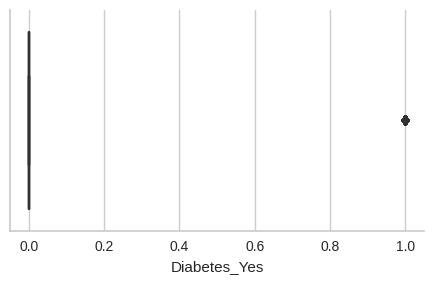

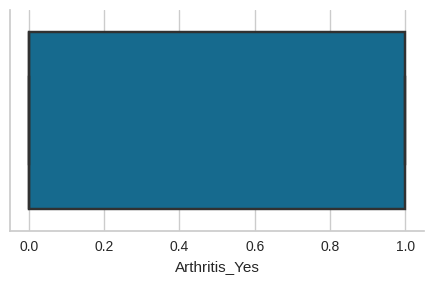

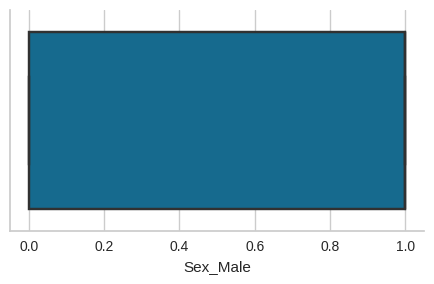

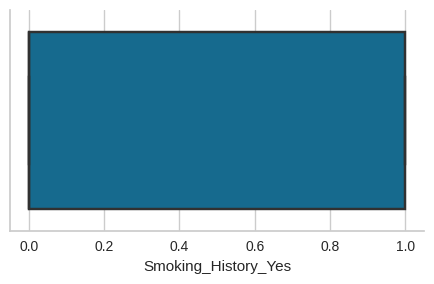

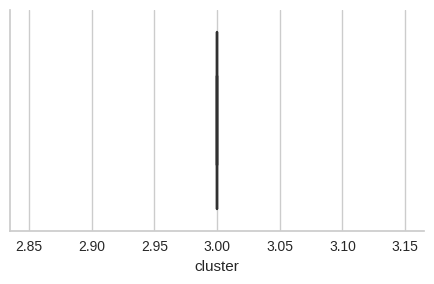

In [1005]:
for i in c3.columns:
  g = sns.FacetGrid(c3,height=3,aspect=1.5)
  g = g.map(sns.boxplot,i)

In [1006]:
from scipy import stats
z_scores = stats.zscore(c3)
abs_z_scores = np.abs(z_scores)
outlier_indices3 = (abs_z_scores > 3).any(axis=1)

In [1007]:
c3_cleaned = c3[~outlier_indices3]
c3_cleaned.shape


(72880, 26)

In [1008]:
print(len(c3)-len(c3_cleaned))

33738


In [1009]:
c4 = dfe.loc[dfe["cluster"]==4]
c4

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes,cluster
20,0,157.0,55.79,22.50,0.0,60.0,30.0,1.0,0,0,...,1,0,0,0,1,0,0,0,0,4
31,9,165.0,84.82,31.12,1.0,60.0,1.0,2.0,1,0,...,1,0,0,0,0,0,1,0,1,4
36,8,168.0,60.78,21.63,0.0,60.0,30.0,2.0,0,0,...,1,0,0,0,0,0,0,0,0,4
37,12,165.0,70.31,25.79,3.0,60.0,30.0,8.0,0,1,...,0,0,1,0,0,0,1,0,1,4
53,8,170.0,65.77,22.71,0.0,90.0,12.0,0.0,0,1,...,0,0,0,1,0,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308809,11,180.0,81.65,25.10,0.0,60.0,0.0,0.0,0,1,...,0,1,0,1,0,1,0,1,0,4
308816,10,173.0,81.65,27.37,0.0,60.0,30.0,8.0,0,1,...,1,0,0,0,0,1,0,1,0,4
308818,2,165.0,56.70,20.80,0.0,60.0,4.0,0.0,0,0,...,1,0,0,0,0,0,0,1,1,4
308830,9,168.0,70.31,25.02,8.0,60.0,2.0,2.0,0,0,...,1,0,0,0,0,0,0,0,1,4


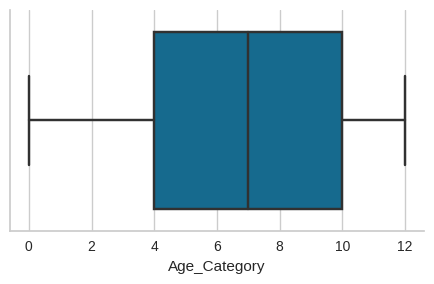

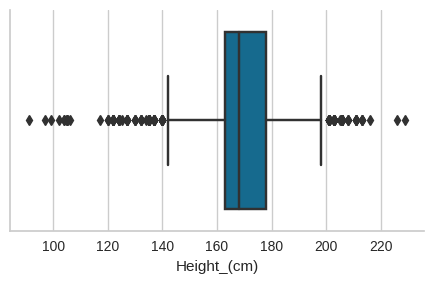

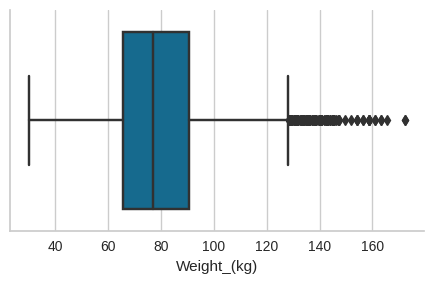

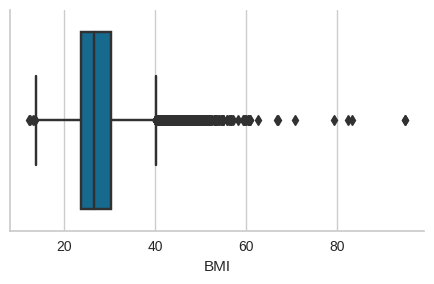

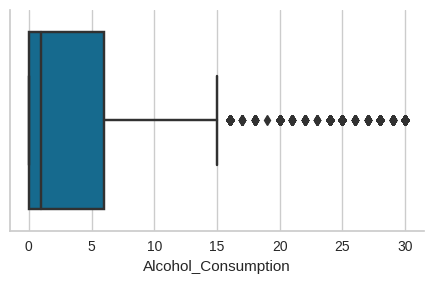

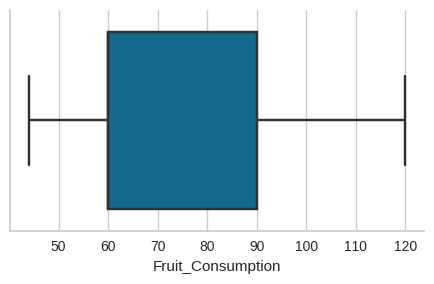

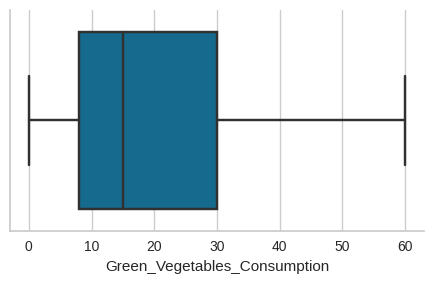

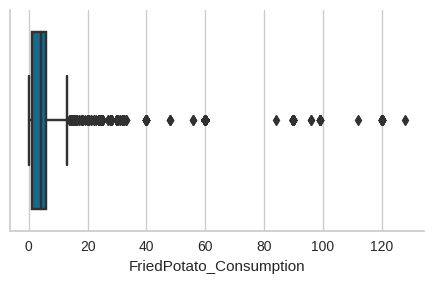

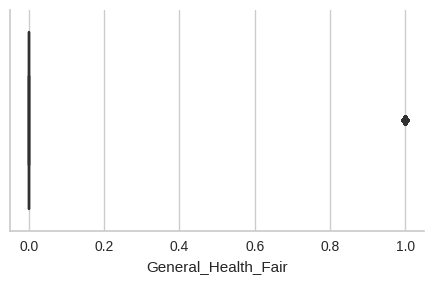

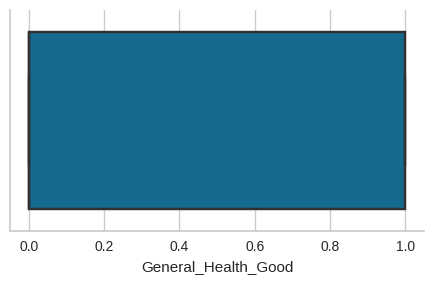

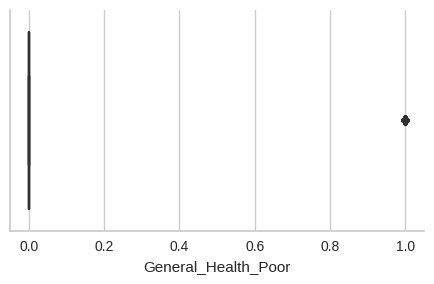

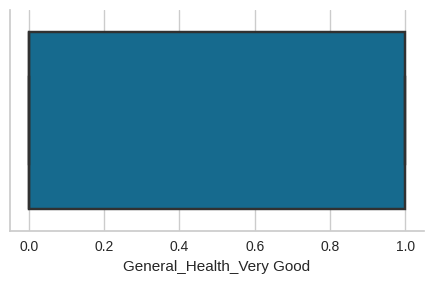

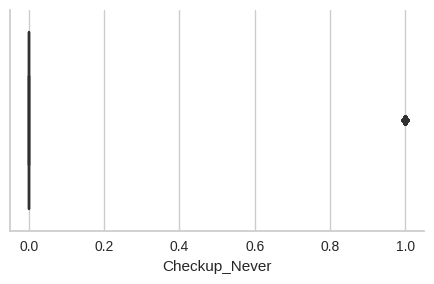

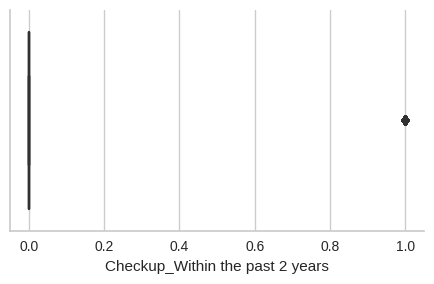

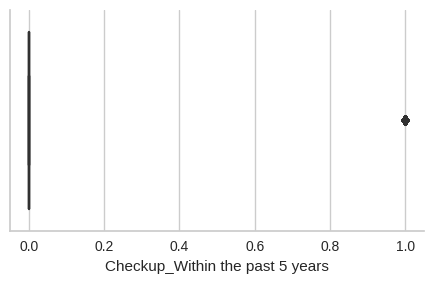

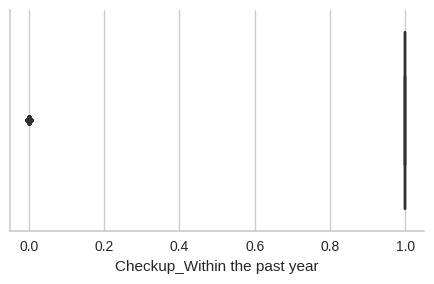

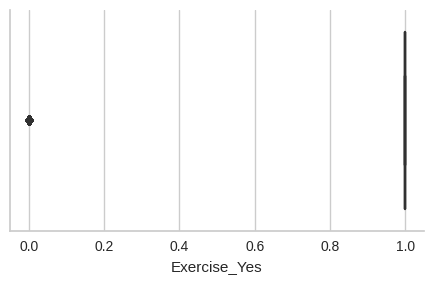

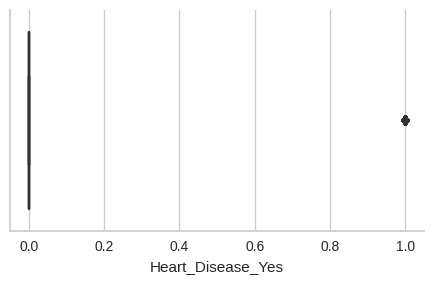

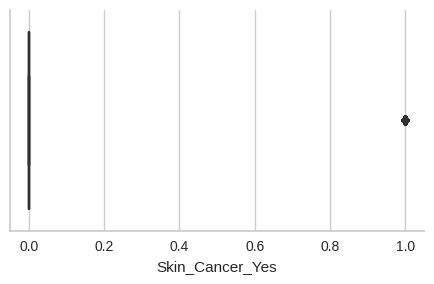

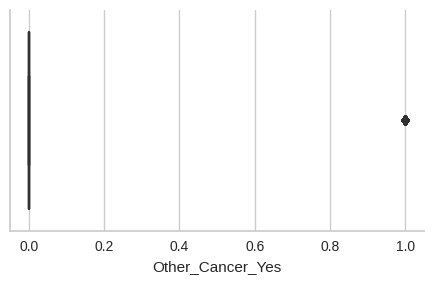

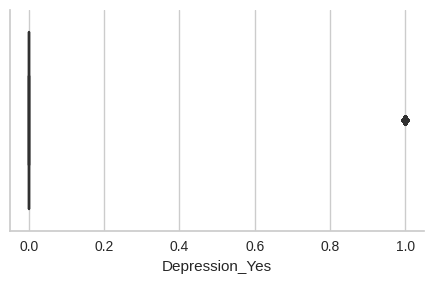

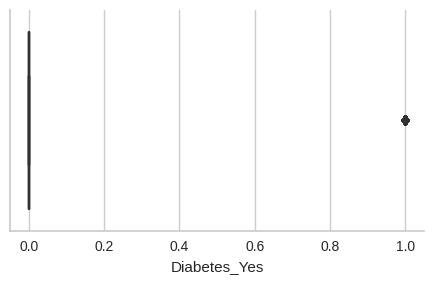

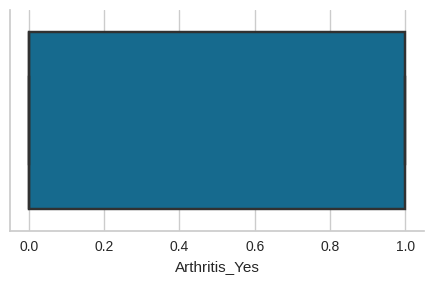

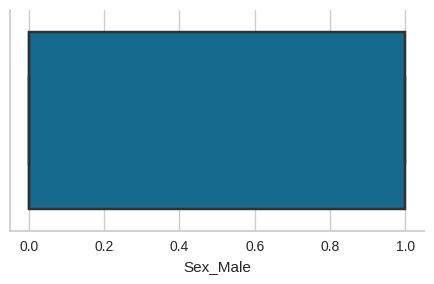

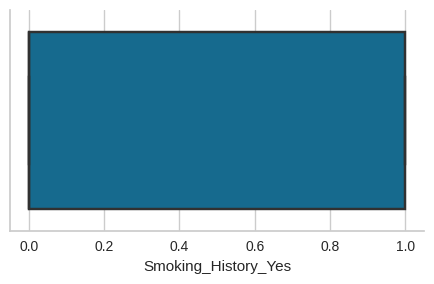

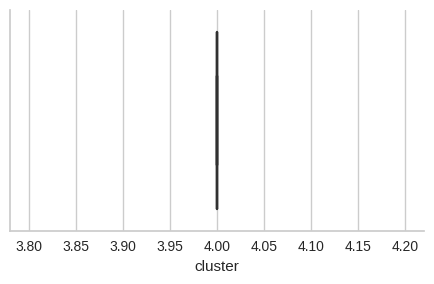

In [1010]:
for i in c4.columns:
  g = sns.FacetGrid(c4,height=3,aspect=1.5)
  g = g.map(sns.boxplot,i)

In [1011]:
from scipy import stats
z_scores = stats.zscore(c4)
abs_z_scores = np.abs(z_scores)
outlier_indices4 = (abs_z_scores > 3).any(axis=1)

In [1012]:
c4_cleaned = c4[~outlier_indices4]
c4_cleaned

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Diabetes_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes,cluster
20,0,157.0,55.79,22.50,0.0,60.0,30.0,1.0,0,0,...,1,0,0,0,1,0,0,0,0,4
36,8,168.0,60.78,21.63,0.0,60.0,30.0,2.0,0,0,...,1,0,0,0,0,0,0,0,0,4
37,12,165.0,70.31,25.79,3.0,60.0,30.0,8.0,0,1,...,0,0,1,0,0,0,1,0,1,4
53,8,170.0,65.77,22.71,0.0,90.0,12.0,0.0,0,1,...,0,0,0,1,0,0,0,1,0,4
86,11,155.0,84.82,35.33,0.0,60.0,8.0,4.0,0,0,...,0,0,0,1,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308780,8,178.0,83.91,26.54,4.0,60.0,30.0,2.0,0,1,...,1,0,0,0,0,0,0,0,1,4
308785,10,188.0,88.45,25.04,2.0,60.0,30.0,2.0,0,1,...,1,0,0,0,0,0,1,1,1,4
308805,10,163.0,63.50,24.03,0.0,60.0,30.0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,4
308816,10,173.0,81.65,27.37,0.0,60.0,30.0,8.0,0,1,...,1,0,0,0,0,1,0,1,0,4


In [1013]:
print(len(c4)-len(c4_cleaned))

16138


In [1014]:
# c0_cleaned.describe()

**Observations:**
* The average age of this cluster is 7,in reality its belongs to 55-59 so majority of this group belongs to upper middle aged


In [1015]:
# c1_cleaned.describe()

In [1016]:
# ['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29'],
#  [10,8,11,12,9,6,5,0,2,7,3,4,1]

In [1017]:
# c2_cleaned.describe()

In [1018]:
# c3_cleaned.describe()

In [1019]:
# c4_cleaned.describe()

Combining cleaned clusters into a single unit

In [1020]:
X = pd.concat([c0_cleaned,c1_cleaned,c2_cleaned,c3_cleaned,c4_cleaned],axis=0,ignore_index=True)

In [1021]:
# for i in X.columns:
#   g = sns.FacetGrid(X,col='cluster')
#   g = g.map(sns.kdeplot, i)

In [1022]:
X.columns

Index(['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_Never',
       'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years',
       'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes',
       'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_Yes',
       'Arthritis_Yes', 'Sex_Male', 'Smoking_History_Yes', 'cluster'],
      dtype='object')

In [1023]:
# from matplotlib import colors
# x = X["Age_Category"]
# y = X["Alcohol_Consumption"]
# z = X["Heart_Disease_Yes"]
# cmap = colors.ListedColormap(['blue','red','yellow'])
# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot(111, projection='3d', label="bla")
# ax.scatter(x, y, z, s=40, c=X["cluster"], marker='o',cmap = cmap)
# ax.set_title("The Plot Of The Clusters")
# plt.show()

In [1024]:
x=X.iloc[:,:-1].values
x

array([[  9.  , 163.  ,  72.57, ...,   0.  ,   0.  ,   1.  ],
       [ 10.  , 152.  ,  52.16, ...,   0.  ,   0.  ,   0.  ],
       [  7.  , 163.  ,  81.19, ...,   0.  ,   0.  ,   1.  ],
       ...,
       [ 10.  , 163.  ,  63.5 , ...,   0.  ,   0.  ,   0.  ],
       [ 10.  , 173.  ,  81.65, ...,   0.  ,   1.  ,   0.  ],
       [  2.  , 165.  ,  56.7 , ...,   0.  ,   1.  ,   1.  ]])

In [1025]:
y=X.iloc[:,-1].values
y

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [1026]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

HYPER PARAMETER TUNING

In [1027]:
# dt_classifier = DecisionTreeClassifier()
# dt_param_grid = {'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
# dt_grid_search = GridSearchCV(dt_classifier, param_grid=dt_param_grid, cv=5)
# dt_grid_search.fit(x, y)
# print("Decision Tree - Best hyperparameters:", dt_grid_search.best_params_)

In [1028]:

# rf_classifier = RandomForestClassifier()
# param_grid = {'n_estimators': [10,20,30],'max_depth': [None,5,10,20]}
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(x, y)
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

In [1029]:
# xgb_classifier = XGBClassifier()
# xgb_param_grid = {'n_estimators': [10,20,30]}
# xgb_grid_search = GridSearchCV(xgb_classifier, param_grid=xgb_param_grid, cv=5)
# xgb_grid_search.fit(x, y)
# print("XGBoost - Best hyperparameters:", xgb_grid_search.best_params_)

In [1030]:
# adaboost_classifier = AdaBoostClassifier()
# adaboost_param_grid = {'n_estimators': [10,20,30,40]}
# adaboost_grid_search = GridSearchCV(adaboost_classifier, param_grid=adaboost_param_grid, cv=5)
# adaboost_grid_search.fit(x, y)
# print("AdaBoost - Best hyperparameters:", adaboost_grid_search.best_params_)

In [1031]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape

((150077, 25), (64319, 25))

In [1032]:
y_train.shape,y_test.shape

((150077,), (64319,))

In [1033]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [1034]:
# base = MultinomialNB()
svm = SVC()
dec = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfc = RandomForestClassifier(n_estimators= 30,random_state=42)
xgb = XGBClassifier(n_estimators = 30)
adb = AdaBoostClassifier(n_estimators=20, random_state=42)
lst_model = [svm,dec,rfc,xgb,adb]

In [ ]:
for i in lst_model:
    print(i)
    print("-"*75)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("Accuracy score of",i," ",accuracy_score(y_test,y_pred))
    labels=[0,1,2,3,4]
    result=confusion_matrix(y_test,y_pred)
    cmd=ConfusionMatrixDisplay(result,display_labels=labels)
    cmd.plot()

SVC()
---------------------------------------------------------------------------


In [ ]:
dic={'Model':['SVM',"Decision Tree","Random Forest","XGBoost","AdaBoost"],'Accuracy score':[0.9932,0.9941,0.9913,0.9971,0.6760]}
result=pd.DataFrame(dic)
result

In [ ]:
sns.barplot(x='Model',y='Accuracy score',data=dic,ci=None,palette='cubehelix')

XG Boost gives highest accuracy score for this model